In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:

%cd /content/drive/My Drive/PhD Dissertation/Psychology SES


/content/drive/My Drive/PhD Dissertation/Psychology SES


In [7]:
# !ls

In [ ]:
import pandas as pd

# Read CSV files into DataFrames
high_ses_df = pd.read_csv("Data/Data with Summarization/high_ses_df_with_summaries.csv")
low_ses_df = pd.read_csv("Data/Data with Summarization/low_ses_df_with_summaries.csv")
medium_ses_df = pd.read_csv("Data/Data with Summarization/medium_ses_df_with_summaries.csv")

# Extract the processed text into lists
low_data_text = low_ses_df['Summary'].to_list()
medium_data_text = medium_ses_df['Summary'].to_list()
high_data_text = high_ses_df['Summary'].to_list()

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
!pip install --quiet sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load SBERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import pandas as pd

# Load the CSV file
file_path = "all_topics_with_coherence_custom_stop_words.csv"
df = pd.read_csv(file_path)

# Drop rows with missing SES category or topic words
df = df.dropna(subset=["SES_Category", "Words"])

# Extract topics as lists of words grouped by SES
ses_topics = {}
for ses in df["SES_Category"].unique():
    # Get list of topic word strings and split them into lists
    word_lists = df[df["SES_Category"] == ses]["Words"].apply(lambda x: x.strip().split(", "))
    ses_topics[ses] = word_lists.tolist()

# Print or export topics per SES
for ses, topics in ses_topics.items():
    print(f"\n{ses} ({len(topics)} topics):")
    for topic in topics:  # Show a few samples
        print(" -", topic)


Low SES (45 topics):
 - ['transition', 'personality', 'research', 'agree', 'indicate', 'participate', 'later', 'health', 'life', 'felt']
 - ['cancer', 'surgery', 'breast', 'chemo', 'diagnose', 'liver', 'nerve', 'knee', 'disease', 'radiation']
 - ['dance', 'run', 'activity', 'swim', 'exercise', 'play', 'swimming', 'night', 'wind', 'theater']
 - ['food', 'eat', 'hotel', 'stamp', 'grocery', 'body', 'store', 'meal', 'dog', 'lunch']
 - ['walk', 'minister', 'movement', 'church', 'read', 'chaplain', 'black', 'faith', 'ordained', 'lottery']
 - ['agree', 'indicate', 'personality', 'transition', 'later', 'health', 'research', 'participate', 'life', 'time']
 - ['wan', 'drive', 'boat', 'highway', 'downsize', 'tire', 'vehicle', 'bridge', 'vest', 'water']
 - ['pressure', 'blood', 'seizure', 'stroke', 'heart', 'peer', 'diabetic', 'medication', 'attack', 'diabetes']
 - ['art', 'building', 'design', 'artist', 'roofing', 'printing', 'range', 'remodel', 'schematic', 'skid']
 - ['woman', 'lady', 'weary',

In [ ]:
low_topics = ses_topics['Low SES']
medium_topics = ses_topics['Medium SES']
high_topics = ses_topics['High SES']

In [ ]:
len(low_topics),len(medium_topics),len(high_topics)

(45, 43, 45)

**The topic weights are calculated by first embedding each narrative (text sample) and each topic into vector form using a pre-trained SBERT model. For each SES group (Low, Medium, High), the model computes how similar each narrative is to each of that group’s topics using cosine similarity. These similarity scores are accumulated across all narratives in that group. Once all scores are collected, the total score for each topic is divided by the number of narratives in that group to get an average. This average similarity score becomes the topic weight, indicating how strongly that topic represents the SES group based on how closely it aligns with the group’s narratives.**

**When a new text is introduced, the model converts the text into an embedding using SBERT. This embedding is then compared to the stored topic embeddings from all SES categories using cosine similarity. The model calculates how similar the new text is to each topic and ranks them by relevance. The result is a list of the most closely related topics from each SES group, along with their similarity scores.**

In [ ]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer

# Load SBERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:


# Convert SES-specific topic lists into strings
low_topic_strs = [" ".join(topic) for topic in low_topics]
medium_topic_strs = [" ".join(topic) for topic in medium_topics]
high_topic_strs = [" ".join(topic) for topic in high_topics]

# Combine and deduplicate all topics
all_unique_topics = list(set(low_topic_strs + medium_topic_strs + high_topic_strs))

# Generate SBERT embeddings for all topics
all_topic_embeddings = sbert_model.encode(all_unique_topics)

# Split each SES group into 80% train, 20% test
low_train, low_test = train_test_split(low_data_text, test_size=0.2, random_state=42)
medium_train, medium_test = train_test_split(medium_data_text, test_size=0.2, random_state=42)
high_train, high_test = train_test_split(high_data_text, test_size=0.2, random_state=42)

# Encode training texts
low_embeddings = sbert_model.encode(low_train)
medium_embeddings = sbert_model.encode(medium_train)
high_embeddings = sbert_model.encode(high_train)

# Optional: encode test sets if needed
# low_test_embeddings = sbert_model.encode(low_test)
# medium_test_embeddings = sbert_model.encode(medium_test)
# high_test_embeddings = sbert_model.encode(high_test)

# Function to compute average cosine similarity from texts to topic list
def compute_topic_similarities(text_embeddings, topic_embeddings, topic_labels):
    topic_scores = defaultdict(float)
    for text_vec in text_embeddings:
        sims = cosine_similarity([text_vec], topic_embeddings)[0]
        for topic_str, score in zip(topic_labels, sims):
            topic_scores[topic_str] += score
    # Normalize by number of documents
    for k in topic_scores:
        topic_scores[k] /= len(text_embeddings)
    return topic_scores

# Compute similarities from each SES group to all unique topics
low_scores = compute_topic_similarities(low_embeddings, all_topic_embeddings, all_unique_topics)
medium_scores = compute_topic_similarities(medium_embeddings, all_topic_embeddings, all_unique_topics)
high_scores = compute_topic_similarities(high_embeddings, all_topic_embeddings, all_unique_topics)

# Build the final similarity DataFrame
topic_similarity_df = pd.DataFrame({
    "Topic": all_unique_topics,
    "Low SES Similarity": [low_scores.get(t, 0) for t in all_unique_topics],
    "Medium SES Similarity": [medium_scores.get(t, 0) for t in all_unique_topics],
    "High SES Similarity": [high_scores.get(t, 0) for t in all_unique_topics],
})

# Save to CSV
topic_similarity_df.to_csv("all_topic_similarities.csv", index=False)
print("Saved topic similarities to all_topic_similarities.csv")

Saved topic similarities to all_topic_similarities.csv


In [ ]:
# Normalize similarity scores so the sum within each SES group equals 1
for ses in ["Low SES Similarity", "Medium SES Similarity", "High SES Similarity"]:
    total_sim = topic_similarity_df[ses].sum()
    if total_sim > 0:
        topic_similarity_df[ses] /= total_sim

In [ ]:
topic_similarity_df.head()

,Topic,Low SES Similarity,Medium SES Similarity,High SES Similarity
0,life people time kind good want work mean day talk,0.017285,0.016787,0.016551
1,computer engineering project technical development product industrial design communication equipment,0.002021,0.001949,0.001717
2,agree indicate personality transition later health research participate life time,0.019715,0.019995,0.020049
3,pressure blood seizure stroke heart peer diabetic medication attack diabetes,0.003755,0.003536,0.003607
4,heart cancer hospital doctor care attack breast nurse surgery widow,0.003806,0.003474,0.003332


In [ ]:
topic_similarity_df.to_csv("all_topic_similarities.csv", index=False)

# **Filter based on weight**

In [ ]:
# import pandas as pd

# # Load the topic weights CSV
# df = pd.read_csv("all_topic_weights_stop_words.csv")

# # Filter rows where any SES weight is greater than 0.01
# filtered_df = df[
#     (df["Low SES Weight"] > 0) |
#     (df["Medium SES Weight"] > 0) |
#     (df["High SES Weight"] > 0)
# ]

# # Count how many topics are associated with each SES group
# low_count = (filtered_df["Low SES Weight"] > 0).sum()
# medium_count = (filtered_df["Medium SES Weight"] > 0).sum()
# high_count = (filtered_df["High SES Weight"] > 0).sum()

# # Print results
# print("Number of topics with weight > 0.02:")
# print(f"Low SES: {low_count}")
# print(f"Medium SES: {medium_count}")
# print(f"High SES: {high_count}")

Number of topics with weight > 0.02:
Low SES: 34
Medium SES: 35
High SES: 42


In [ ]:
len(filtered_df)

111

In [ ]:
# filtered_df.to_csv("topic_weights_stop_words.csv", index=False)

# **filter similar topics**

In [ ]:
# import pandas as pd
# from sentence_transformers import SentenceTransformer, util
# import torch

# # Load your file
# df = pd.read_csv("all_topic_similarities.csv")

# # Define the SES weight columns
# ses_weight_columns = ["Low SES Similarity", "Medium SES Similarity", "High SES Similarity"]

# # Drop rows where any SES weight is less than 0
# df = df[(df[ses_weight_columns] >= 0).all(axis=1)].reset_index(drop=True)

# # Function to get SES groups with weight > 0
# def get_ses_groups(row):
#     ses = []
#     if row.get("Low SES Weight", 0) > 0:
#         ses.append("Low SES")
#     if row.get("Medium SES Weight", 0) > 0:
#         ses.append("Medium SES")
#     if row.get("High SES Weight", 0) > 0:
#         ses.append("High SES")
#     return ", ".join(ses)

# # Apply the function to add SES category string
# df["SES"] = df.apply(get_ses_groups, axis=1)


In [ ]:
import pandas as pd

# Load your topic similarity DataFrame
df = pd.read_csv("all_topic_similarities.csv")

# Assume ses_topics dict has lists of word lists, e.g. [["school", "teacher"], ...]
low_topics = ses_topics["Low SES"]
medium_topics = ses_topics["Medium SES"]
high_topics = ses_topics["High SES"]

# Convert lists of words to strings
low_topics_str = [" ".join(topic) for topic in low_topics]
medium_topics_str = [" ".join(topic) for topic in medium_topics]
high_topics_str = [" ".join(topic) for topic in high_topics]

# Build mapping
topic_to_ses = {}
for topic in low_topics_str:
    topic_to_ses[topic] = "Low SES"
for topic in medium_topics_str:
    topic_to_ses[topic] = "Medium SES"
for topic in high_topics_str:
    topic_to_ses[topic] = "High SES"

# Map to DataFrame — assumes df["Topic"] contains string versions of topics
df["SES"] = df["Topic"].map(topic_to_ses)

# Save to new file
df.to_csv("all_topic_similarities_with_ses.csv", index=False)
print("✅ Saved to 'all_topic_similarities_with_ses.csv'")

✅ Saved to 'all_topic_similarities_with_ses.csv'


In [ ]:
df.head()

,Topic,Low SES Similarity,Medium SES Similarity,High SES Similarity,SES
0,life people time kind good want work mean day talk,0.017285,0.016787,0.016551,Low SES
1,computer engineering project technical development product industrial design communication equipment,0.002021,0.001949,0.001717,Medium SES
2,agree indicate personality transition later health research participate life time,0.019715,0.019995,0.020049,Low SES
3,pressure blood seizure stroke heart peer diabetic medication attack diabetes,0.003755,0.003536,0.003607,Low SES
4,heart cancer hospital doctor care attack breast nurse surgery widow,0.003806,0.003474,0.003332,Medium SES


In [ ]:

# Drop rows with missing data in relevant columns
df = df[["Topic", 'Low SES Similarity', 'Medium SES Similarity', 'High SES Similarity', "SES"]].dropna()

# Load SBERT model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Group topics by SES and encode them
grouped = df.groupby("SES")
ses_embeddings = {
    ses: [(idx, row["Topic"], model.encode(row["Topic"])) for idx, row in group.iterrows()]
    for ses, group in grouped
}

# Compare embeddings between SES groups
rows_to_keep = []
for ses1, topics1 in ses_embeddings.items():
    for idx1, words1, emb1 in topics1:
        similar_found = False
        for ses2, topics2 in ses_embeddings.items():
            if ses1 == ses2:
                continue
            for idx2, words2, emb2 in topics2:
                if util.cos_sim(emb1, emb2) >= 0.6:
                    similar_found = True
                    break
            if similar_found:
                break
        if not similar_found:
            rows_to_keep.append(idx1)

# Create the filtered DataFrame
filtered_df = df.loc[rows_to_keep]
# Save to file (optional)
filtered_df.to_csv("filtered_topics_by_semantic_similarity_stop_summary.csv", index=False)
print("Filtered topics saved successfully.")

Filtered topics saved successfully.


In [ ]:
len(filtered_df)

78

In [ ]:
filtered_df["SES"].value_counts()

,count
SES,
Low SES,29
High SES,25
Medium SES,24


In [ ]:
# filtered_df.to_csv("filtered_topic_weights_stop_words_sim_summary.csv",index=False)

Interpretability for the whole system

In [ ]:
filtered_df.head(1)

,Topic,Low SES Similarity,Medium SES Similarity,High SES Similarity,SES
5,future television communication journalism possible skill novel action commercial speak,0.00602,0.006068,0.006221,High SES


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("filtered_topic_weights_stop_words_sim_summary.csv")
topics_df = pd.read_csv("Top_SES_Topic_Distribution_stem_custom_stop_words.csv")


In [ ]:
topics_df.head(1)

,Theme,SES_Category,Topic,Count,Words
0,physical_health_literacy,Low SES,0,2806,"transition, personality, research, agree, indicate, participate, later, health, life, felt"


In [ ]:
len(df)

78

# **Visulization**

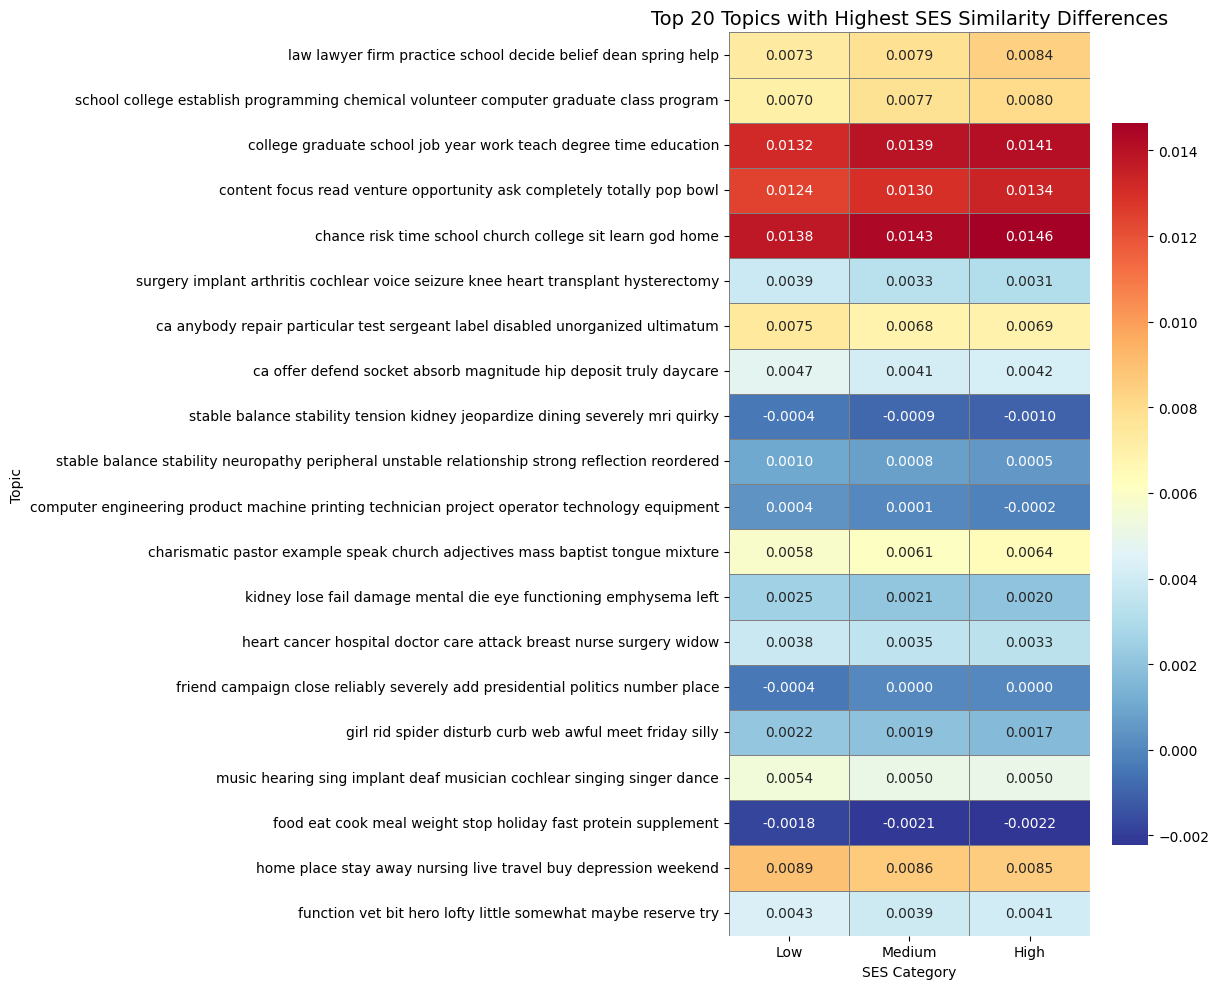

In [ ]:
# # Rename for ease
# df.rename(columns={
#     "Low SES Similarity": "Low",
#     "Medium SES Similarity": "Medium",
#     "High SES Similarity": "High"
# }, inplace=True)

# # Compute max pairwise difference per topic
# df["MaxDiff"] = df[["Low", "Medium", "High"]].max(axis=1) - df[["Low", "Medium", "High"]].min(axis=1)

# # Select top N topics with highest SES similarity differences
# top_n = 20  # You can change this value
# df_top = df.sort_values("MaxDiff", ascending=False).head(top_n)

# # Prepare data for heatmap
# heatmap_data = df_top.set_index("Topic")[["Low", "Medium", "High"]]

# # Plot heatmap
# plt.figure(figsize=(12, len(heatmap_data) * 0.5))
# sns.heatmap(
#     heatmap_data,
#     cmap="RdYlBu_r",  # Or try "coolwarm", "viridis", etc.
#     annot=True,
#     fmt=".4f",
#     linewidths=0.5,
#     linecolor='gray',
#     cbar_kws={"shrink": 0.8}
# )
# plt.title(f"Top {top_n} Topics with Highest SES Similarity Differences", fontsize=14)
# plt.xlabel("SES Category")
# plt.ylabel("Topic")
# plt.tight_layout()
# plt.show()

In [ ]:
topics_df.head(2)

,Theme,SES_Category,Count,Topic
0,physical_health_literacy,Low SES,2806,transition personality research agree indicate participate later health life felt
1,physical_health_literacy,Low SES,409,cancer surgery breast chemo diagnose liver nerve knee disease radiation


In [ ]:
df.head(2)

,Topic,Low,Medium,High,SES,MaxDiff
0,future television communication journalism possible skill novel action commercial speak,0.006020,0.006068,0.006221,High SES,0.000201
1,law lawyer firm practice school decide belief dean spring help,0.007315,0.007854,0.008432,High SES,0.001118


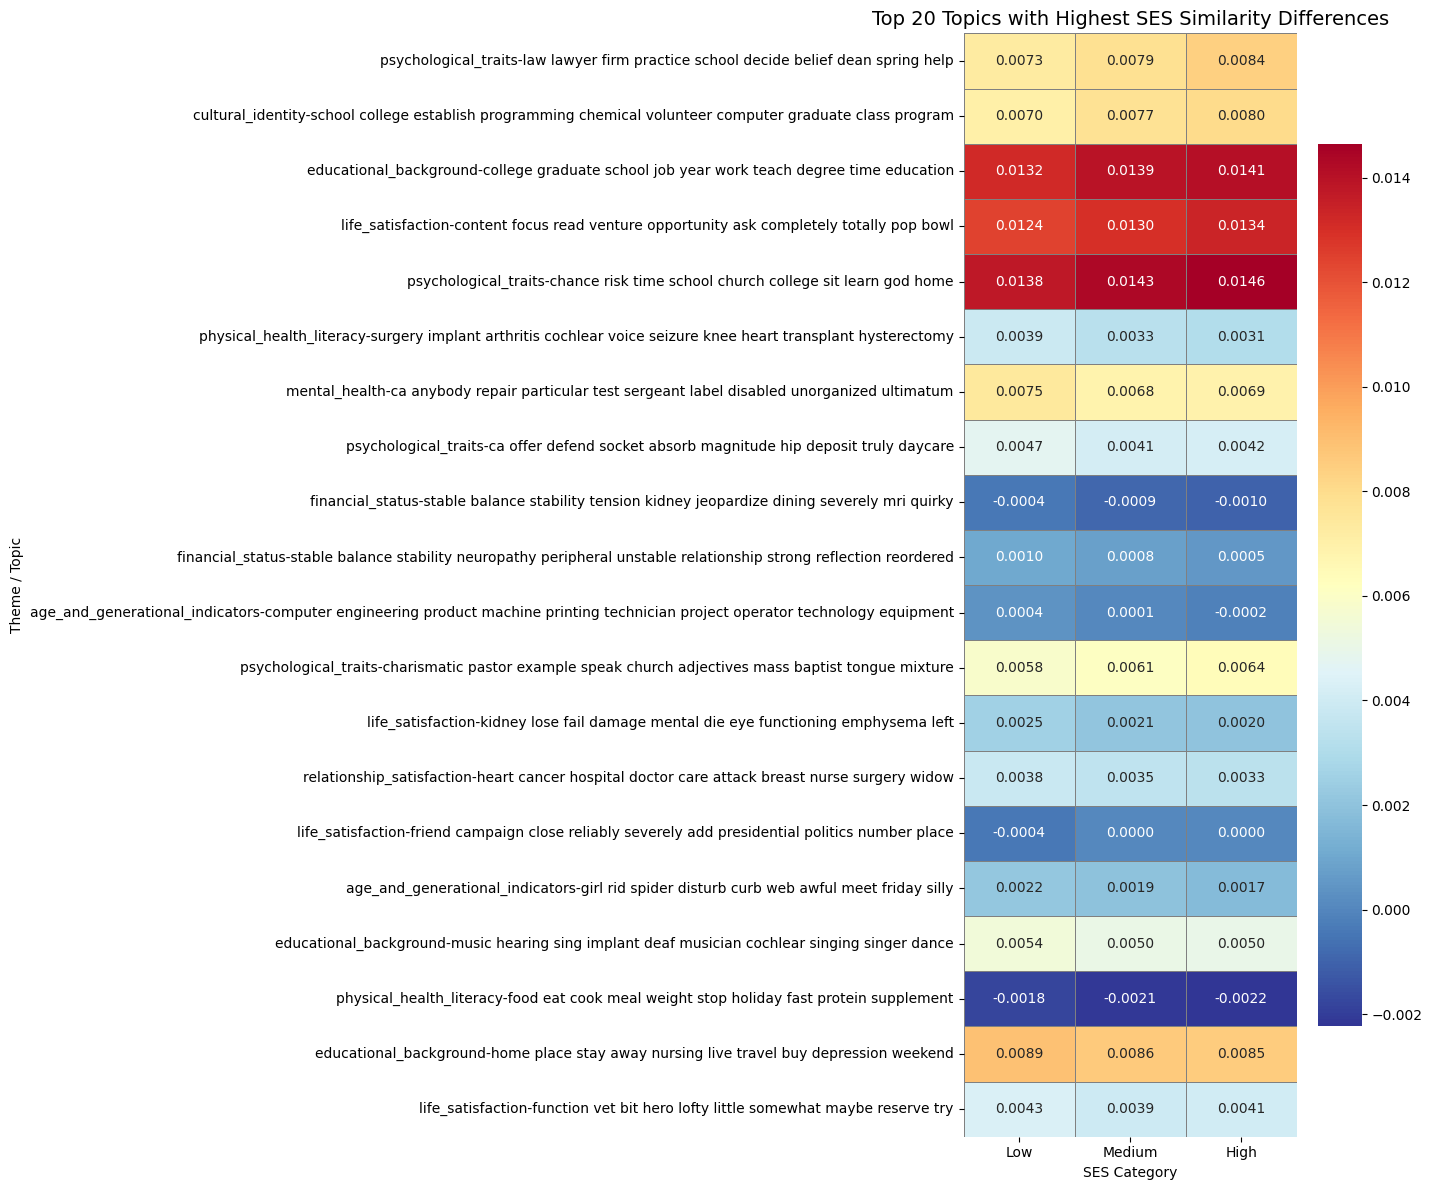

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df = pd.read_csv("filtered_topic_weights_stop_words_sim_summary.csv")
topics_df = pd.read_csv("Top_SES_Topic_Distribution_stem_custom_stop_words.csv")

# Preprocessing
topics_df = topics_df.drop(columns=["Topic"])
topics_df = topics_df.rename(columns={"Words": "Topic"})
# Convert list of words in the 'Topic' column into a comma-separated string
def clean_topic(value):
    if isinstance(value, str):
        # Split by comma, strip each word, and join with space
        return " ".join(word.strip() for word in value.split(","))
    return value  # If not string, return as-is

topics_df["Topic"] = topics_df["Topic"].apply(clean_topic)

df = df.rename(columns={
    "Low SES Similarity": "Low",
    "Medium SES Similarity": "Medium",
    "High SES Similarity": "High"
})
df["MaxDiff"] = df[["Low", "Medium", "High"]].max(axis=1) - df[["Low", "Medium", "High"]].min(axis=1)

# Merge
merged_df = pd.merge(df, topics_df, on="Topic", how="left")

# Select top N topics
top_n = 20
df_top = merged_df.sort_values("MaxDiff", ascending=False).head(top_n)

# Create MultiIndex from Theme and Topic
df_top.index = pd.MultiIndex.from_arrays([df_top["Theme"], df_top["Topic"]], names=["Theme", "Topic"])
heatmap_data = df_top[["Low", "Medium", "High"]]

# Plot
plt.figure(figsize=(14, len(heatmap_data) * 0.6))
sns.heatmap(
    heatmap_data,
    cmap="RdYlBu_r",
    annot=True,
    fmt=".4f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8}
)
plt.title(f"Top {top_n} Topics with Highest SES Similarity Differences", fontsize=14)
plt.xlabel("SES Category")
plt.ylabel("Theme / Topic")
plt.tight_layout()
plt.show()

✅ Heatmap saved as: top_25_SES_topic_similarity_heatmap.png


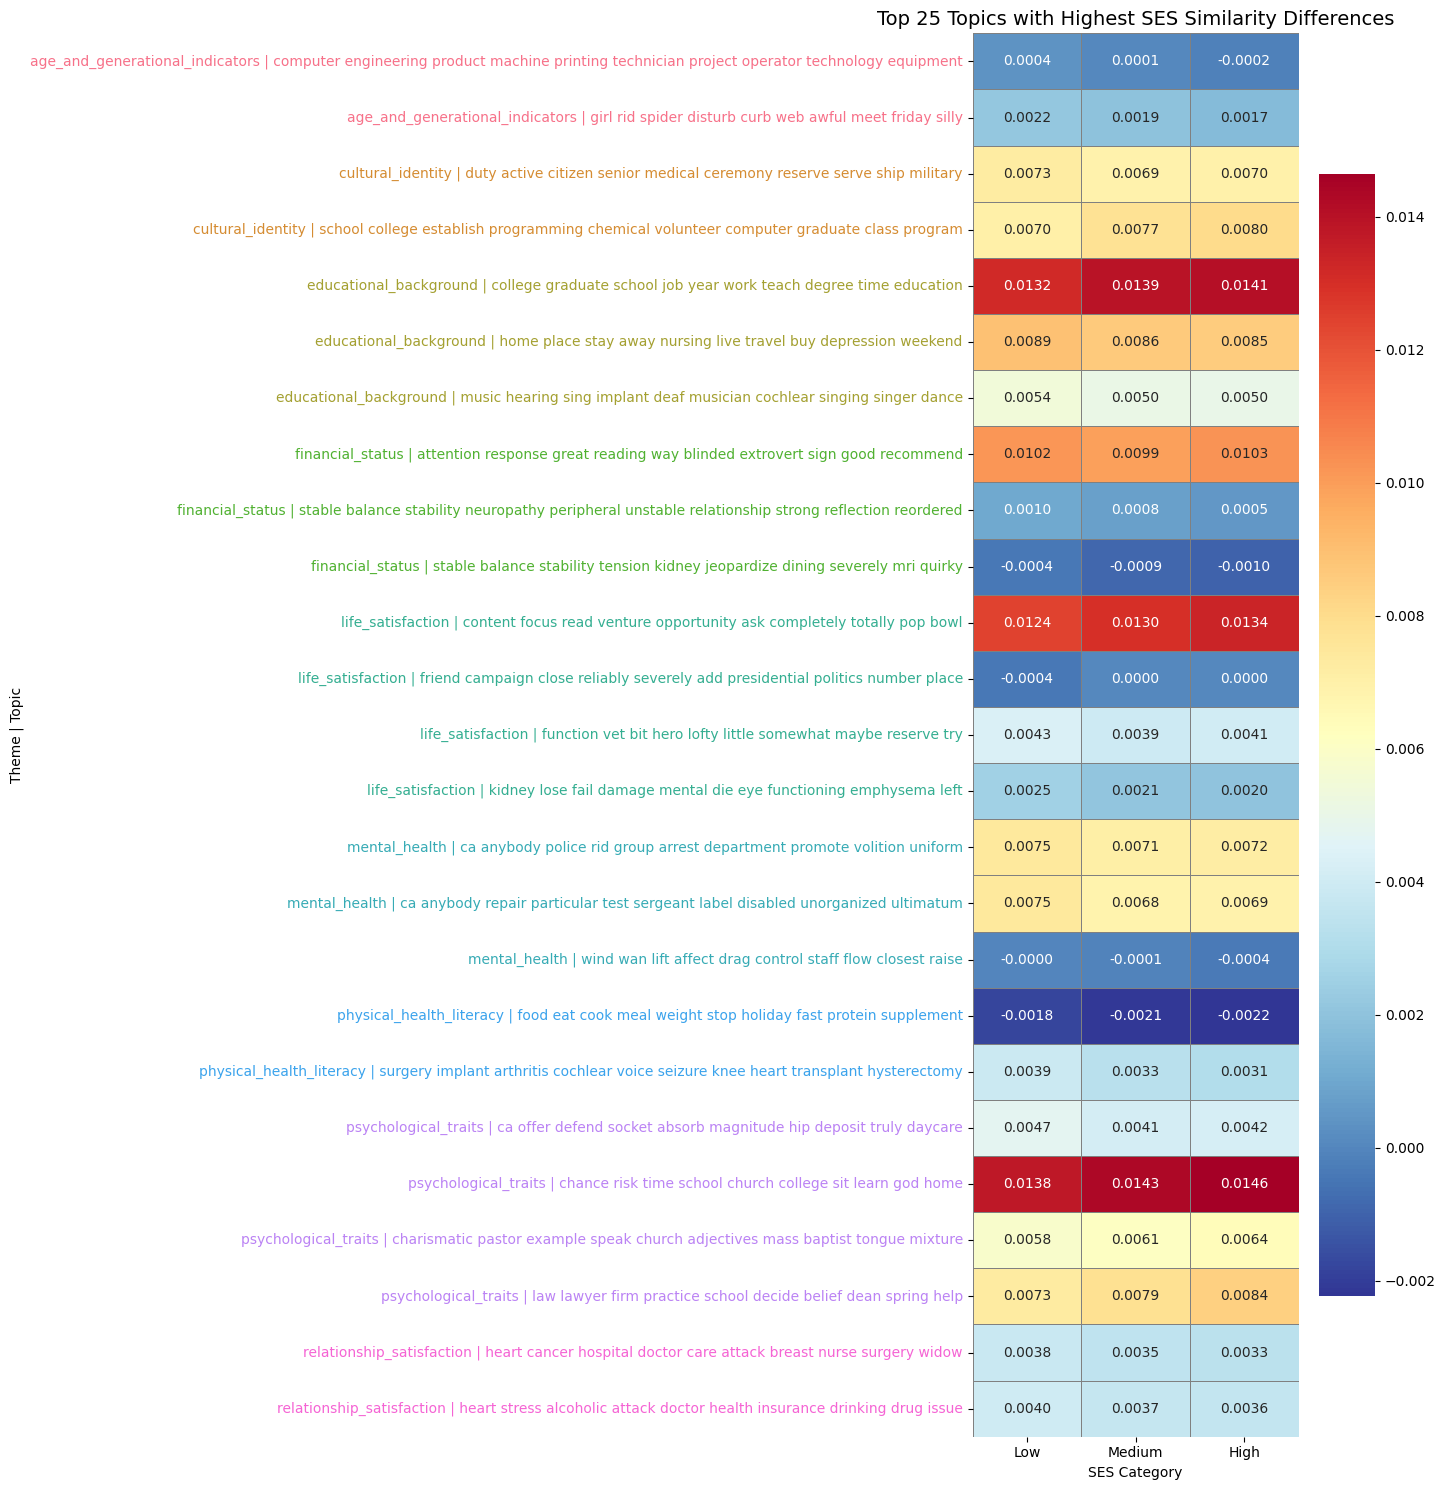

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df = pd.read_csv("filtered_topic_weights_stop_words_sim_summary.csv")
topics_df = pd.read_csv("Top_SES_Topic_Distribution_stem_custom_stop_words.csv")

# Preprocessing
topics_df = topics_df.drop(columns=["Topic"])
topics_df = topics_df.rename(columns={"Words": "Topic"})

# Clean topic strings
def clean_topic(value):
    if isinstance(value, str):
        return " ".join(word.strip() for word in value.split(","))
    return value

topics_df["Topic"] = topics_df["Topic"].apply(clean_topic)

# Rename similarity columns
df = df.rename(columns={
    "Low SES Similarity": "Low",
    "Medium SES Similarity": "Medium",
    "High SES Similarity": "High"
})

# Compute max difference
df["MaxDiff"] = df[["Low", "Medium", "High"]].max(axis=1) - df[["Low", "Medium", "High"]].min(axis=1)

# Merge theme info
merged_df = pd.merge(df, topics_df, on="Topic", how="left")

# Select top N topics
top_n = 25
df_top = merged_df.sort_values("MaxDiff", ascending=False).head(top_n)

# Sort by Theme and Topic
df_top = df_top.sort_values(by=["Theme", "Topic"])

# Create label column
df_top["Theme_Topic"] = df_top["Theme"] + " | " + df_top["Topic"]
df_top.set_index("Theme_Topic", inplace=True)

# Prepare heatmap data
heatmap_data = df_top[["Low", "Medium", "High"]]

# Assign colors for themes
unique_themes = df_top["Theme"].unique()
palette = sns.color_palette("husl", len(unique_themes))
theme_color_map = dict(zip(unique_themes, palette))

# Plot heatmap
plt.figure(figsize=(14, len(heatmap_data) * 0.6))
ax = sns.heatmap(
    heatmap_data,
    cmap="RdYlBu_r",
    annot=True,
    fmt=".4f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8}
)

plt.title(f"Top {top_n} Topics with Highest SES Similarity Differences", fontsize=14)
plt.xlabel("SES Category")
plt.ylabel("Theme | Topic")
plt.tight_layout()

# Color Y-axis tick labels based on Theme
for tick_label in ax.get_yticklabels():
    label_text = tick_label.get_text()
    theme = label_text.split(" | ")[0]
    tick_label.set_color(theme_color_map.get(theme, "black"))

# Save the figure to file
output_file = f"top_{top_n}_SES_topic_similarity_heatmap.png"
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"✅ Heatmap saved as: {output_file}")

plt.show()

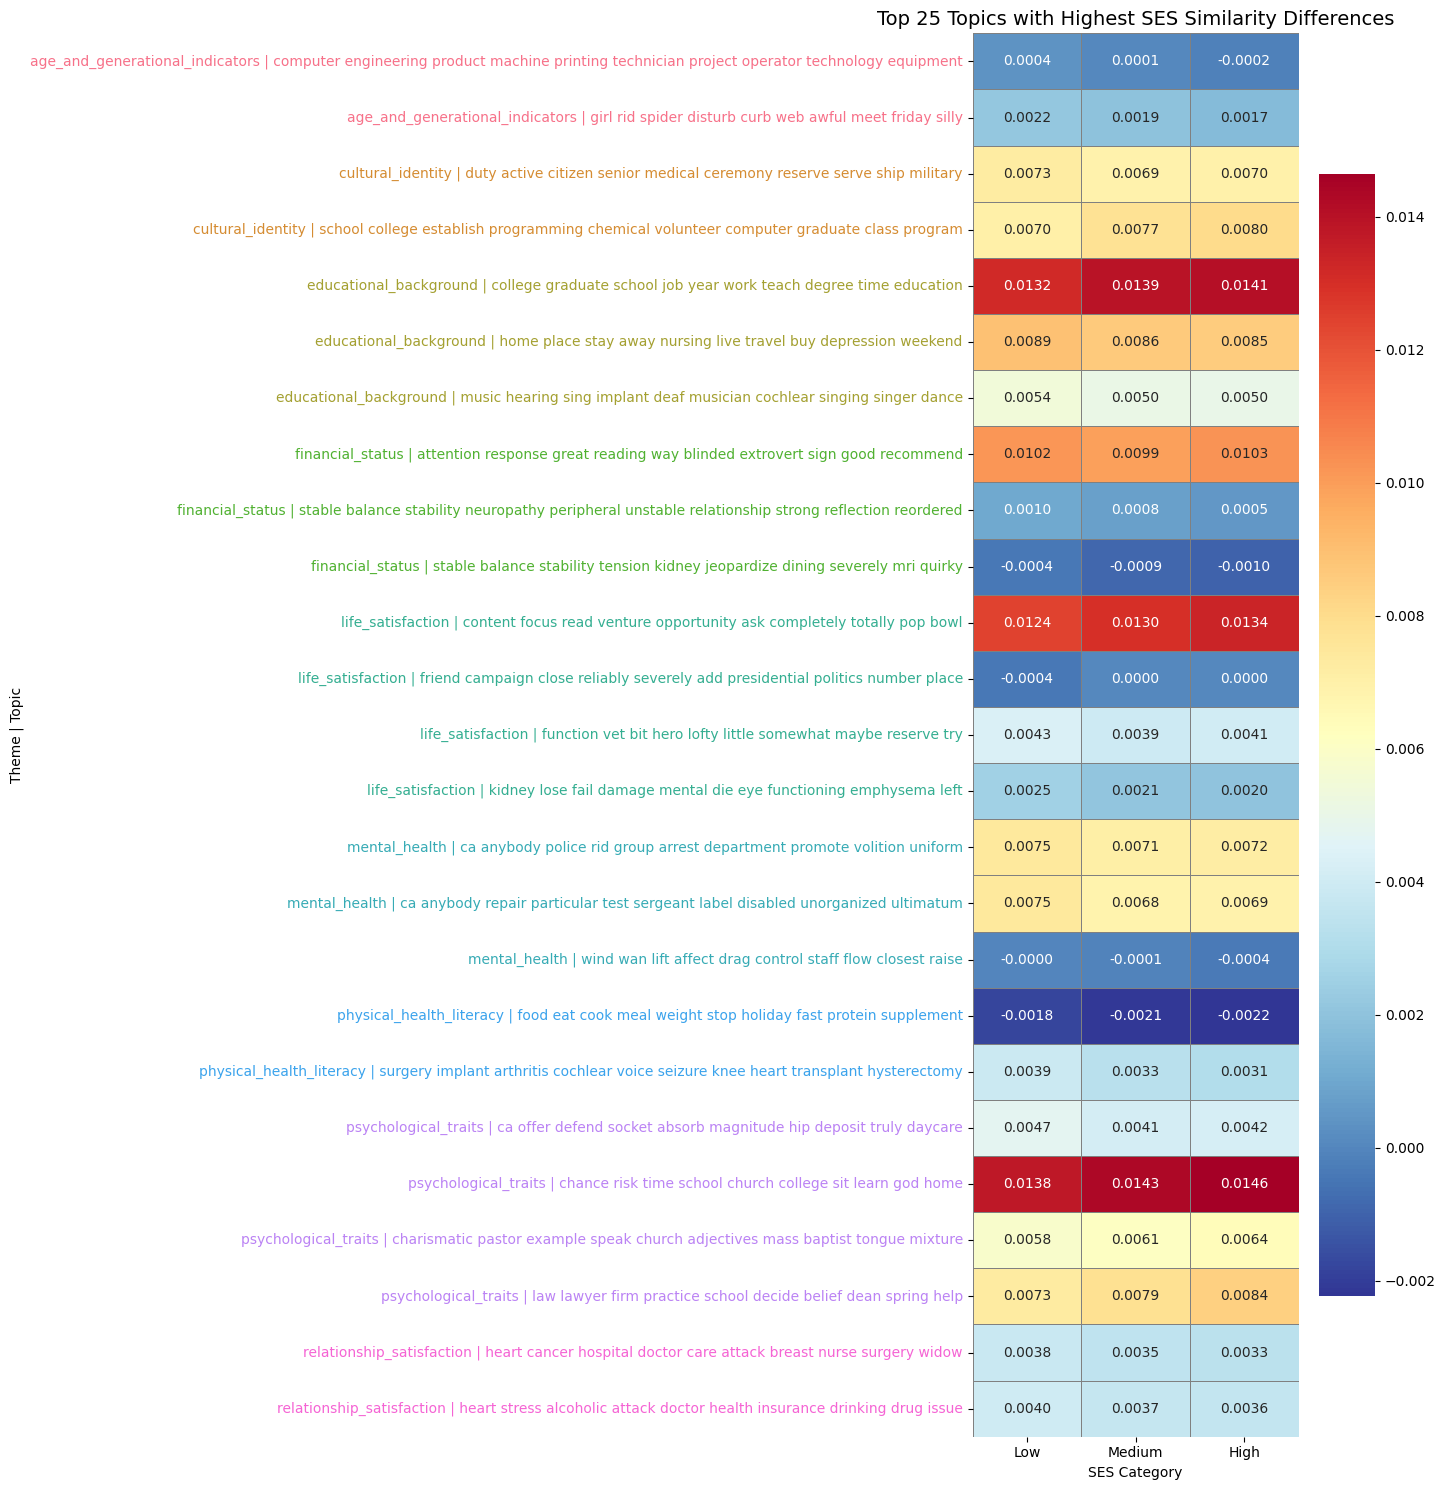

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df = pd.read_csv("filtered_topic_weights_stop_words_sim_summary.csv")
topics_df = pd.read_csv("Top_SES_Topic_Distribution_stem_custom_stop_words.csv")

# Preprocessing
topics_df = topics_df.drop(columns=["Topic"])
topics_df = topics_df.rename(columns={"Words": "Topic"})

# Clean topic strings
def clean_topic(value):
    if isinstance(value, str):
        return " ".join(word.strip() for word in value.split(","))
    return value

topics_df["Topic"] = topics_df["Topic"].apply(clean_topic)

# Rename similarity columns
df = df.rename(columns={
    "Low SES Similarity": "Low",
    "Medium SES Similarity": "Medium",
    "High SES Similarity": "High"
})

# Compute max difference
df["MaxDiff"] = df[["Low", "Medium", "High"]].max(axis=1) - df[["Low", "Medium", "High"]].min(axis=1)

# Merge theme info
merged_df = pd.merge(df, topics_df, on="Topic", how="left")

# Select top N topics
top_n = 25
df_top = merged_df.sort_values("MaxDiff", ascending=False).head(top_n)

# Sort by Theme and Topic
df_top = df_top.sort_values(by=["Theme", "Topic"])

# Create label column
df_top["Theme_Topic"] = df_top["Theme"] + " | " + df_top["Topic"]
df_top.set_index("Theme_Topic", inplace=True)

# Prepare heatmap data
heatmap_data = df_top[["Low", "Medium", "High"]]

# Assign colors for themes
unique_themes = df_top["Theme"].unique()
palette = sns.color_palette("husl", len(unique_themes))
theme_color_map = dict(zip(unique_themes, palette))

# Plot heatmap
plt.figure(figsize=(14, len(heatmap_data) * 0.6))
ax = sns.heatmap(
    heatmap_data,
    cmap="RdYlBu_r",
    annot=True,
    fmt=".4f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8}
)

plt.title(f"Top {top_n} Topics with Highest SES Similarity Differences", fontsize=14)
plt.xlabel("SES Category")
plt.ylabel("Theme | Topic")
plt.tight_layout()

# Color Y-axis tick labels based on Theme
for tick_label in ax.get_yticklabels():
    label_text = tick_label.get_text()
    theme = label_text.split(" | ")[0]
    tick_label.set_color(theme_color_map.get(theme, "black"))

plt.show()

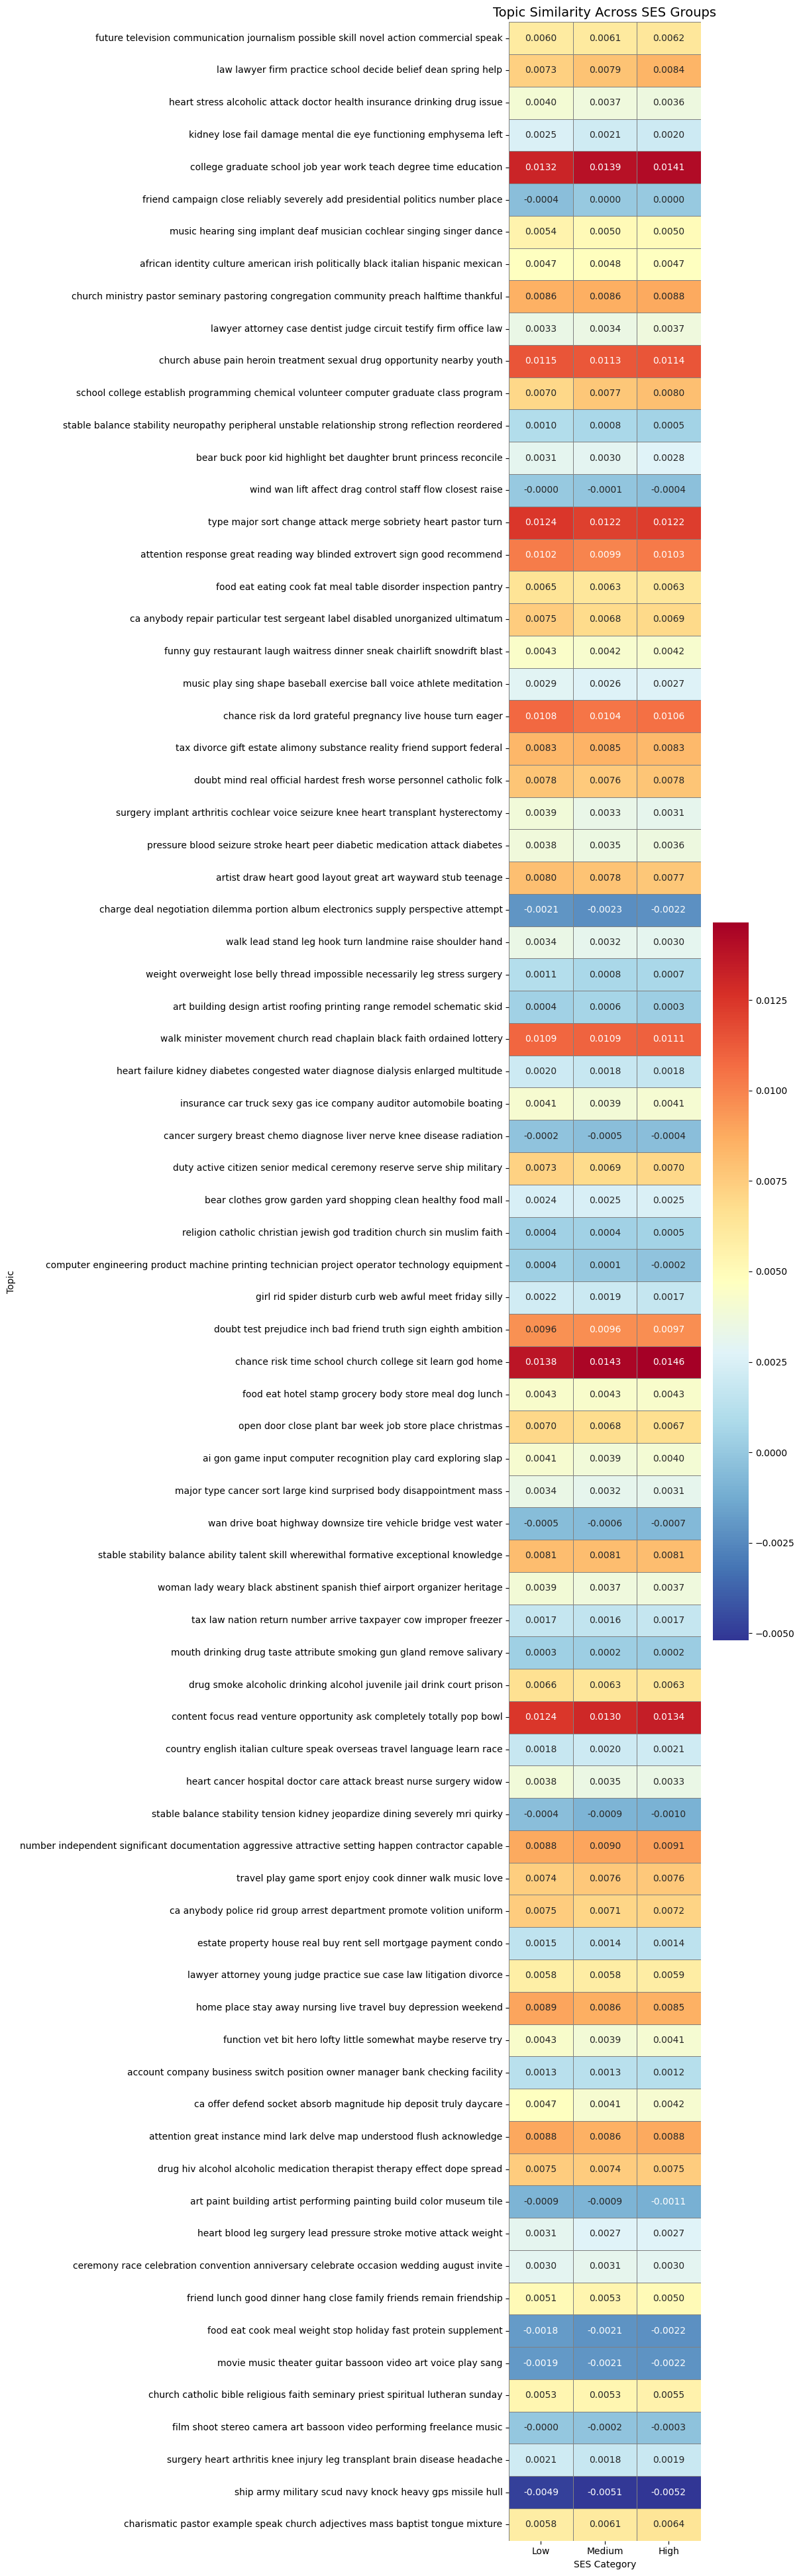

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("filtered_topic_weights_stop_words_sim_summary.csv")

# Optional: Rename columns for simpler display (optional)
df.rename(columns={
    "Low SES Similarity": "Low",
    "Medium SES Similarity": "Medium",
    "High SES Similarity": "High"
}, inplace=True)

# Select relevant columns and set topic as index
heatmap_data = df.set_index("Topic")[["Low", "Medium", "High"]]

# Plot heatmap with a high-contrast diverging colormap
plt.figure(figsize=(12, len(heatmap_data) * 0.5))
sns.heatmap(
    heatmap_data,
    cmap="RdYlBu_r",  # High contrast diverging colormap
    # cmap="viridis",
    annot=True,
    fmt=".4f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8}
)
plt.title("Topic Similarity Across SES Groups", fontsize=14)
plt.xlabel("SES Category")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()


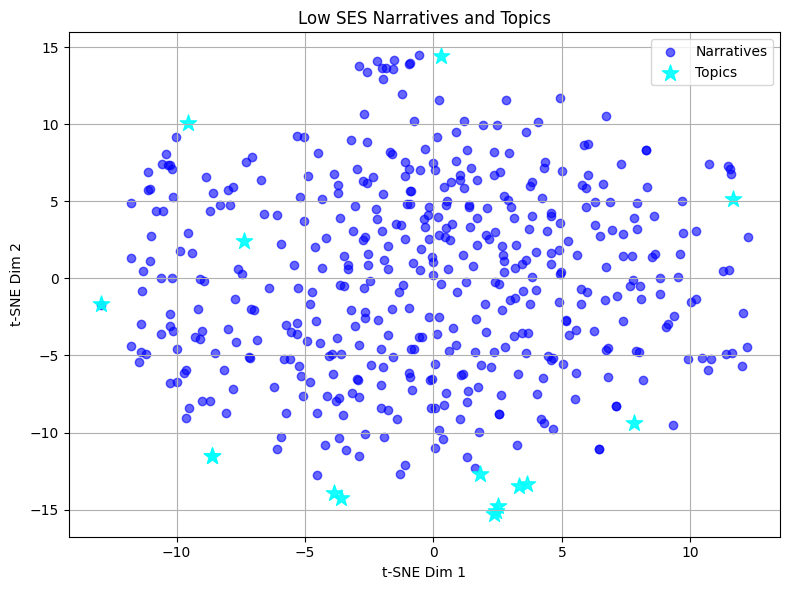

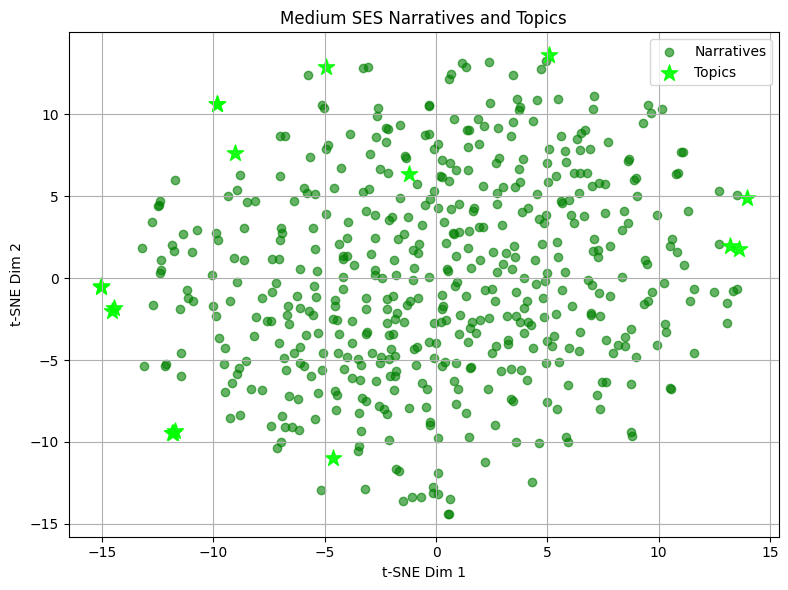

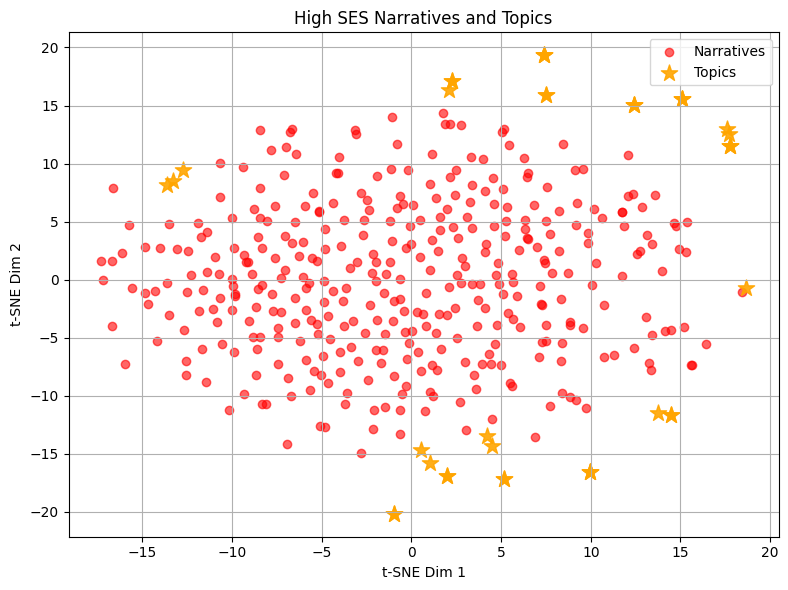

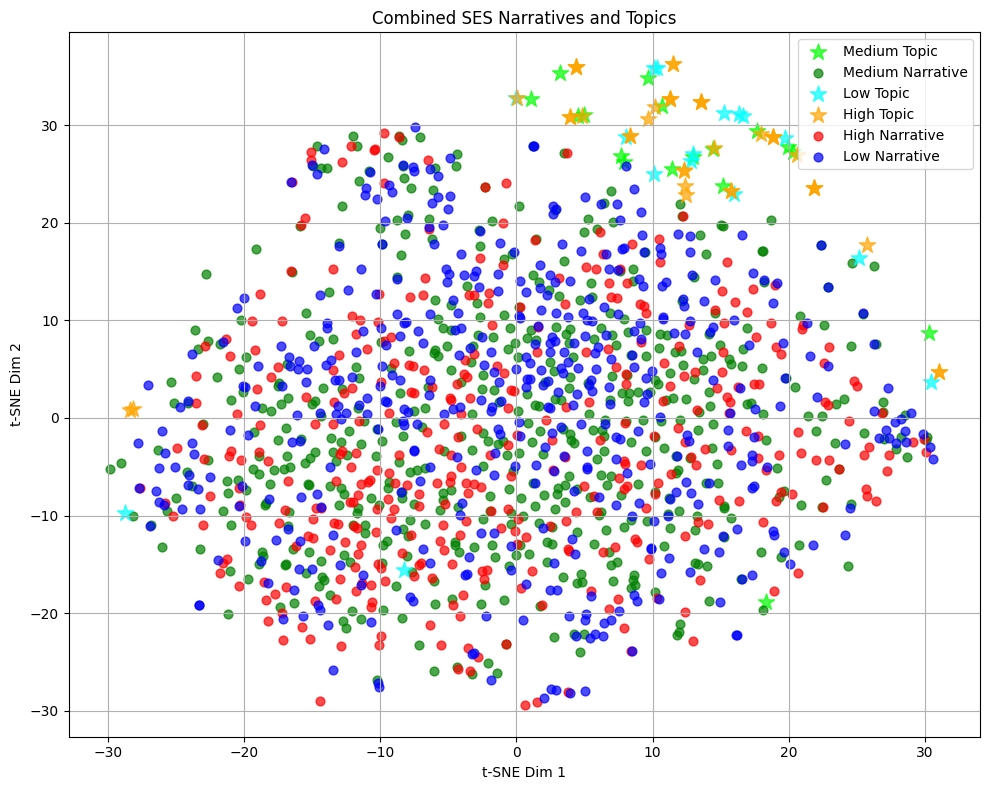

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sentence_transformers import SentenceTransformer

# Load SBERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode narrative embeddings
low_embeddings = sbert_model.encode(low_data_text)
medium_embeddings = sbert_model.encode(medium_data_text)
high_embeddings = sbert_model.encode(high_data_text)

# Load and filter top topics
topic_weights_df = pd.read_csv("filtered_topic_weights_stop_words_sim.csv")
N = 24
selected_topics = []
for ses in ["Low SES", "Medium SES", "High SES"]:
    weight_col = f"{ses} Weight"
    top_topics = (
        topic_weights_df[topic_weights_df[weight_col] > -1]
        .sort_values(by=weight_col, ascending=False)
        .head(N)[["Topic"]].copy()
    )
    top_topics["SES"] = ses
    selected_topics.append(top_topics)

balanced_topics_df = pd.concat(selected_topics, ignore_index=True)
topic_to_ses = dict(zip(balanced_topics_df["Topic"], balanced_topics_df["SES"]))
topic_texts = balanced_topics_df["Topic"].tolist()
topic_embeddings = sbert_model.encode(topic_texts)

# Filter narrative outliers
def filter_outliers(embeddings):
    clf = IsolationForest(contamination=0.05, random_state=42)
    preds = clf.fit_predict(embeddings)
    return embeddings[preds == 1]

low_embeddings = filter_outliers(low_embeddings)
medium_embeddings = filter_outliers(medium_embeddings)
high_embeddings = filter_outliers(high_embeddings)

# Group topic embeddings by SES
low_topic_embeddings, medium_topic_embeddings, high_topic_embeddings = [], [], []
for topic, emb in zip(topic_texts, topic_embeddings):
    if topic_to_ses[topic] == "Low SES":
        low_topic_embeddings.append(emb)
    elif topic_to_ses[topic] == "Medium SES":
        medium_topic_embeddings.append(emb)
    elif topic_to_ses[topic] == "High SES":
        high_topic_embeddings.append(emb)

# Plot function
def plot_tsne(narrative_emb, topic_emb, title, narrative_color, topic_color, filename):
    all_emb = np.vstack([narrative_emb, topic_emb])
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced = tsne.fit_transform(all_emb)

    plt.figure(figsize=(8, 6))
    plt.scatter(
        reduced[:len(narrative_emb), 0], reduced[:len(narrative_emb), 1],
        label="Narratives", alpha=0.6, color=narrative_color
    )
    plt.scatter(
        reduced[len(narrative_emb):, 0], reduced[len(narrative_emb):, 1],
        label="Topics", alpha=0.9, marker="*", s=150, color=topic_color
    )
    plt.title(title)
    plt.legend()
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Save and show each SES plot
plot_tsne(low_embeddings, np.array(low_topic_embeddings), "Low SES Narratives and Topics", "blue", "cyan", "low_ses_plot.png")
plot_tsne(medium_embeddings, np.array(medium_topic_embeddings), "Medium SES Narratives and Topics", "green", "lime", "medium_ses_plot.png")
plot_tsne(high_embeddings, np.array(high_topic_embeddings), "High SES Narratives and Topics", "red", "orange", "high_ses_plot.png")

# Combined t-SNE plot
combined_embeddings = np.vstack([
    low_embeddings, medium_embeddings, high_embeddings,
    np.array(low_topic_embeddings), np.array(medium_topic_embeddings), np.array(high_topic_embeddings)
])
combined_labels = (
    ["Low Narrative"] * len(low_embeddings) +
    ["Medium Narrative"] * len(medium_embeddings) +
    ["High Narrative"] * len(high_embeddings) +
    ["Low Topic"] * len(low_topic_embeddings) +
    ["Medium Topic"] * len(medium_topic_embeddings) +
    ["High Topic"] * len(high_topic_embeddings)
)

tsne_combined = TSNE(n_components=2, perplexity=30, random_state=42)
combined_reduced = tsne_combined.fit_transform(combined_embeddings)

colors = {
    "Low Narrative": "blue",
    "Medium Narrative": "green",
    "High Narrative": "red",
    "Low Topic": "cyan",
    "Medium Topic": "lime",
    "High Topic": "orange"
}

markers = {
    "Narrative": "o",
    "Topic": "*"
}

plt.figure(figsize=(10, 8))
for label in set(combined_labels):
    idxs = [i for i, l in enumerate(combined_labels) if l == label]
    label_type = "Topic" if "Topic" in label else "Narrative"
    plt.scatter(
        combined_reduced[idxs, 0], combined_reduced[idxs, 1],
        label=label,
        alpha=0.7,
        color=colors[label],
        marker=markers[label_type],
        s=150 if label_type == "Topic" else 40
    )
plt.legend()
plt.title("Combined SES Narratives and Topics")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("combined_ses_plot.png")
plt.show()

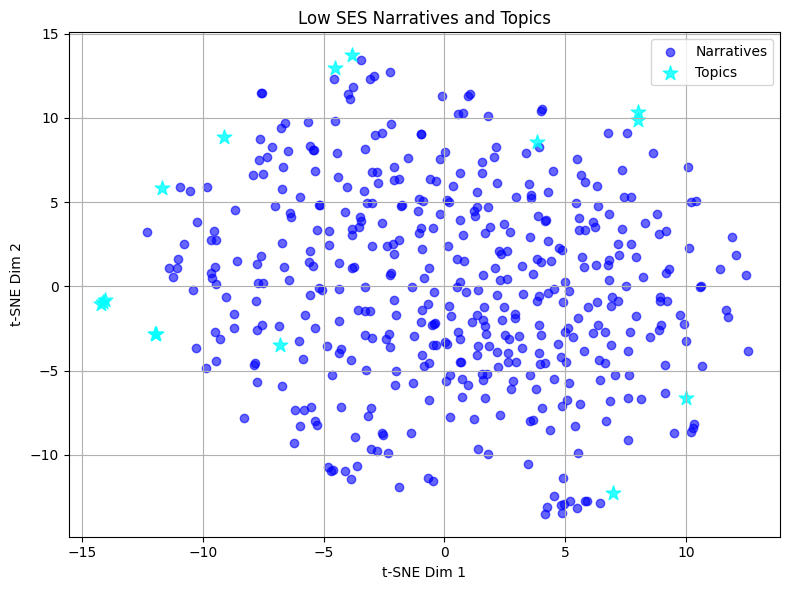

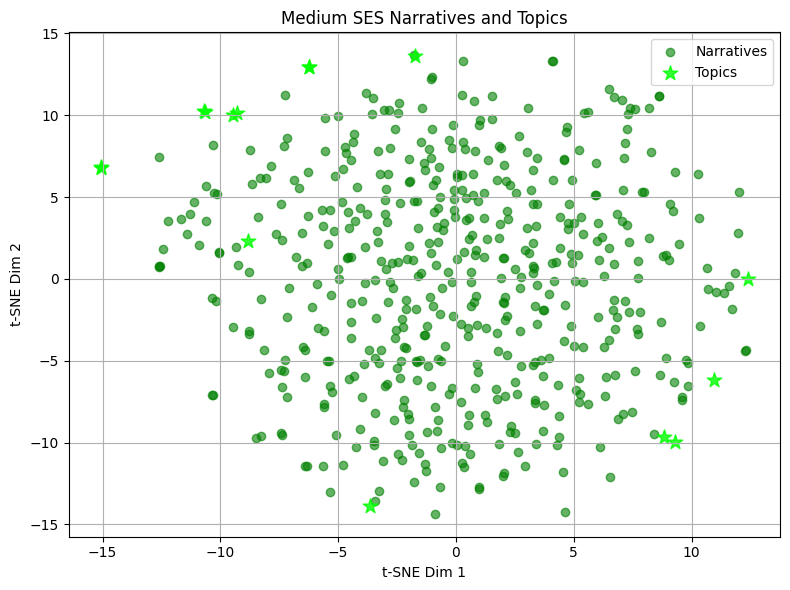

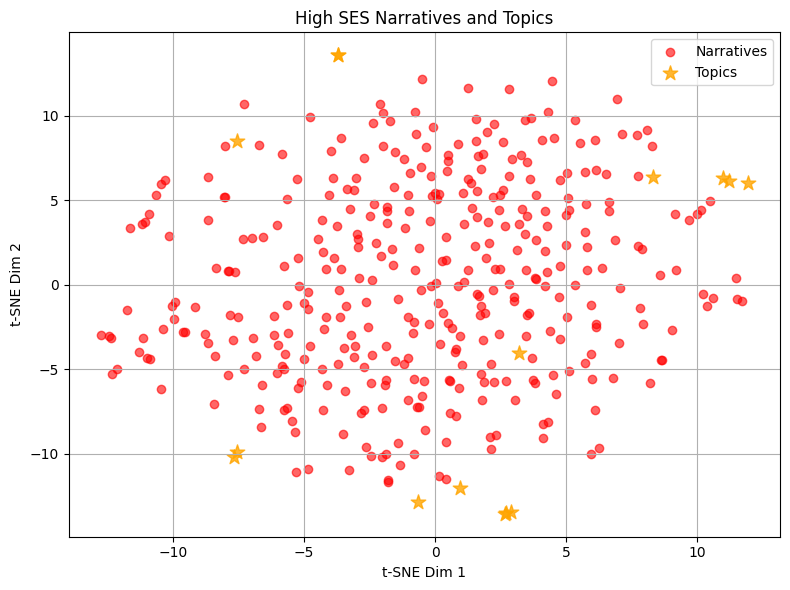

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sentence_transformers import SentenceTransformer

# Load SBERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Replace with your data
# Example: low_data_text = [...]
# medium_data_text = [...]
# high_data_text = [...]

# Encode narrative embeddings
low_embeddings = sbert_model.encode(low_data_text)
medium_embeddings = sbert_model.encode(medium_data_text)
high_embeddings = sbert_model.encode(high_data_text)

# Load and filter top topics
topic_weights_df = pd.read_csv("filtered_topic_weights_stop_words_sim.csv")
N = 15
selected_topics = []
for ses in ["Low SES", "Medium SES", "High SES"]:
    weight_col = f"{ses} Weight"
    top_topics = (
        topic_weights_df[topic_weights_df[weight_col] > -1]
        .sort_values(by=weight_col, ascending=False)
        .head(N)
    )
    top_topics = top_topics[["Topic"]].copy()
    top_topics["SES"] = ses
    selected_topics.append(top_topics)

balanced_topics_df = pd.concat(selected_topics, ignore_index=True)
topic_to_ses = dict(zip(balanced_topics_df["Topic"], balanced_topics_df["SES"]))
topic_texts = balanced_topics_df["Topic"].tolist()
topic_embeddings = sbert_model.encode(topic_texts)

# Combine embeddings and filter outliers per SES
def filter_outliers(embeddings):
    clf = IsolationForest(contamination=0.05, random_state=42)
    preds = clf.fit_predict(embeddings)
    return embeddings[preds == 1]

low_embeddings = filter_outliers(low_embeddings)
medium_embeddings = filter_outliers(medium_embeddings)
high_embeddings = filter_outliers(high_embeddings)

# Group topics by SES
low_topic_embeddings = []
medium_topic_embeddings = []
high_topic_embeddings = []

for topic, emb in zip(topic_texts, topic_embeddings):
    if topic_to_ses[topic] == "Low SES":
        low_topic_embeddings.append(emb)
    elif topic_to_ses[topic] == "Medium SES":
        medium_topic_embeddings.append(emb)
    elif topic_to_ses[topic] == "High SES":
        high_topic_embeddings.append(emb)

# Function to plot a single SES group
def plot_tsne(narrative_emb, topic_emb, title, narrative_color, topic_color):
    all_emb = np.vstack([narrative_emb, topic_emb])
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced = tsne.fit_transform(all_emb)

    plt.figure(figsize=(8, 6))
    plt.scatter(
        reduced[:len(narrative_emb), 0], reduced[:len(narrative_emb), 1],
        label="Narratives", alpha=0.6, color=narrative_color
    )
    plt.scatter(
        reduced[len(narrative_emb):, 0], reduced[len(narrative_emb):, 1],
        label="Topics", alpha=0.8, marker="*", s=120, color=topic_color
    )
    plt.title(title)
    plt.legend()
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each SES group separately
plot_tsne(low_embeddings, np.array(low_topic_embeddings), "Low SES Narratives and Topics", "blue", "cyan")
plot_tsne(medium_embeddings, np.array(medium_topic_embeddings), "Medium SES Narratives and Topics", "green", "lime")
plot_tsne(high_embeddings, np.array(high_topic_embeddings), "High SES Narratives and Topics", "red", "orange")

SBERT Embeddings Are Denser for Narratives
	•	Narratives are paragraphs/sentences with multiple dimensions of meaning.
	•	The sentence transformer learns to embed full texts closer together based on common themes.
	•	Topics, on the other hand, might represent more extreme or distinct meanings → thus pushed outward in the embedding space.

  

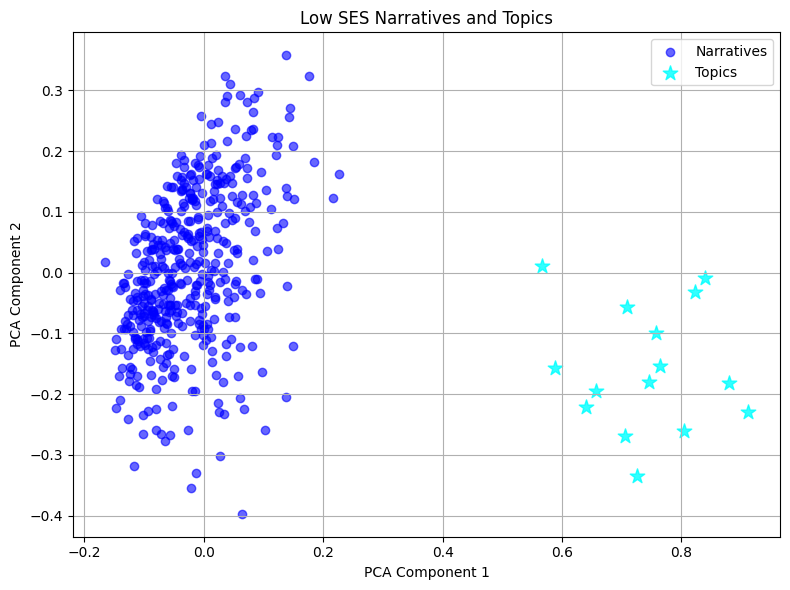

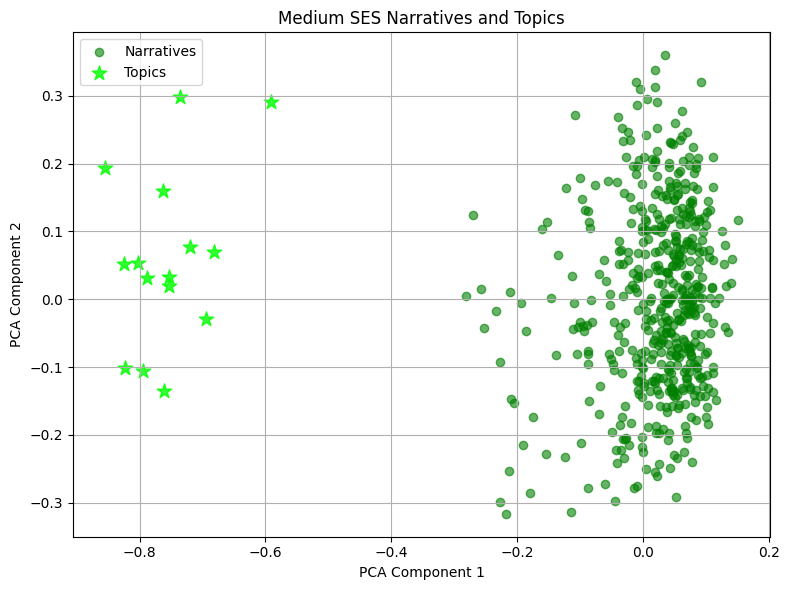

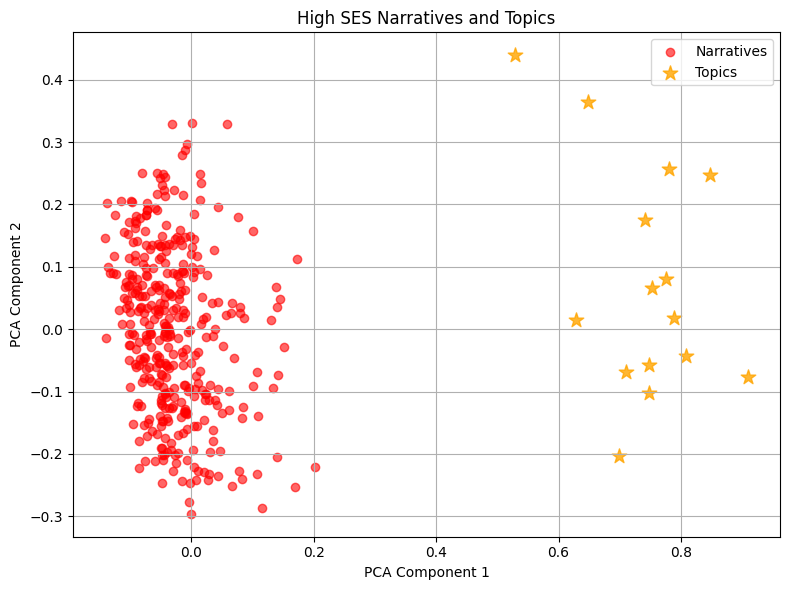

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sentence_transformers import SentenceTransformer

# Load SBERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Replace with your data
# Example: low_data_text = [...]
# medium_data_text = [...]
# high_data_text = [...]

# Encode narrative embeddings
low_embeddings = sbert_model.encode(low_data_text)
medium_embeddings = sbert_model.encode(medium_data_text)
high_embeddings = sbert_model.encode(high_data_text)

# Load and filter top topics
topic_weights_df = pd.read_csv("filtered_topic_weights_stop_words_sim.csv")
N = 15
selected_topics = []
for ses in ["Low SES", "Medium SES", "High SES"]:
    weight_col = f"{ses} Weight"
    top_topics = (
        topic_weights_df[topic_weights_df[weight_col] > -1]
        .sort_values(by=weight_col, ascending=False)
        .head(N)
    )
    top_topics = top_topics[["Topic"]].copy()
    top_topics["SES"] = ses
    selected_topics.append(top_topics)

balanced_topics_df = pd.concat(selected_topics, ignore_index=True)
topic_to_ses = dict(zip(balanced_topics_df["Topic"], balanced_topics_df["SES"]))
topic_texts = balanced_topics_df["Topic"].tolist()
topic_embeddings = sbert_model.encode(topic_texts)

# Combine embeddings and filter outliers per SES
def filter_outliers(embeddings):
    clf = IsolationForest(contamination=0.05, random_state=42)
    preds = clf.fit_predict(embeddings)
    return embeddings[preds == 1]

low_embeddings = filter_outliers(low_embeddings)
medium_embeddings = filter_outliers(medium_embeddings)
high_embeddings = filter_outliers(high_embeddings)

# Group topic embeddings by SES
low_topic_embeddings = []
medium_topic_embeddings = []
high_topic_embeddings = []

for topic, emb in zip(topic_texts, topic_embeddings):
    if topic_to_ses[topic] == "Low SES":
        low_topic_embeddings.append(emb)
    elif topic_to_ses[topic] == "Medium SES":
        medium_topic_embeddings.append(emb)
    elif topic_to_ses[topic] == "High SES":
        high_topic_embeddings.append(emb)

# Function to plot a single SES group using PCA
def plot_pca(narrative_emb, topic_emb, title, narrative_color, topic_color):
    all_emb = np.vstack([narrative_emb, topic_emb])
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(all_emb)

    plt.figure(figsize=(8, 6))
    plt.scatter(
        reduced[:len(narrative_emb), 0], reduced[:len(narrative_emb), 1],
        label="Narratives", alpha=0.6, color=narrative_color
    )
    plt.scatter(
        reduced[len(narrative_emb):, 0], reduced[len(narrative_emb):, 1],
        label="Topics", alpha=0.8, marker="*", s=120, color=topic_color
    )
    plt.title(title)
    plt.legend()
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each SES group separately
plot_pca(low_embeddings, np.array(low_topic_embeddings), "Low SES Narratives and Topics", "blue", "cyan")
plot_pca(medium_embeddings, np.array(medium_topic_embeddings), "Medium SES Narratives and Topics", "green", "lime")
plot_pca(high_embeddings, np.array(high_topic_embeddings), "High SES Narratives and Topics", "red", "orange")

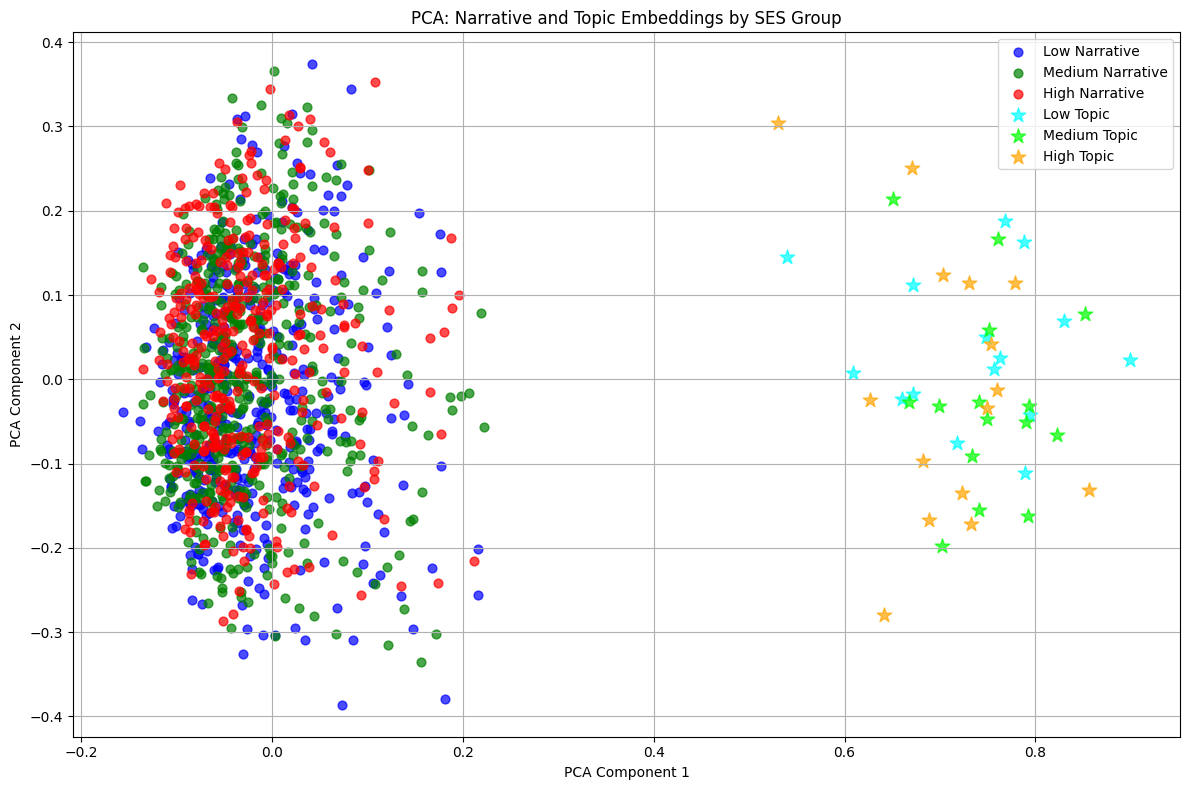

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sentence_transformers import SentenceTransformer

# Load SBERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Replace with your own text data
# Example:
# low_data_text = [...]
# medium_data_text = [...]
# high_data_text = [...]

# Step 1: Encode narratives
low_embeddings = sbert_model.encode(low_data_text)
medium_embeddings = sbert_model.encode(medium_data_text)
high_embeddings = sbert_model.encode(high_data_text)

# Step 2: Filter outliers
def filter_outliers(embeddings):
    clf = IsolationForest(contamination=0.05, random_state=42)
    preds = clf.fit_predict(embeddings)
    return embeddings[preds == 1]

low_embeddings = filter_outliers(low_embeddings)
medium_embeddings = filter_outliers(medium_embeddings)
high_embeddings = filter_outliers(high_embeddings)

# Step 3: Load and select top topic embeddings
topic_weights_df = pd.read_csv("filtered_topic_weights_stop_words_sim.csv")
N = 15
selected_topics = []

for ses in ["Low SES", "Medium SES", "High SES"]:
    weight_col = f"{ses} Weight"
    top_topics = (
        topic_weights_df[topic_weights_df[weight_col] > -1]
        .sort_values(by=weight_col, ascending=False)
        .head(N)
    )
    top_topics = top_topics[["Topic"]].copy()
    top_topics["SES"] = ses
    selected_topics.append(top_topics)

balanced_topics_df = pd.concat(selected_topics, ignore_index=True)
topic_to_ses = dict(zip(balanced_topics_df["Topic"], balanced_topics_df["SES"]))
topic_texts = balanced_topics_df["Topic"].tolist()
topic_embeddings = sbert_model.encode(topic_texts)

# Step 4: Split topic embeddings by SES
low_topic_embeddings, medium_topic_embeddings, high_topic_embeddings = [], [], []

for topic, emb in zip(topic_texts, topic_embeddings):
    ses = topic_to_ses[topic]
    if ses == "Low SES":
        low_topic_embeddings.append(emb)
    elif ses == "Medium SES":
        medium_topic_embeddings.append(emb)
    elif ses == "High SES":
        high_topic_embeddings.append(emb)

# Step 5: Combine all embeddings and labels
all_embeddings = np.vstack([
    low_embeddings,
    medium_embeddings,
    high_embeddings,
    low_topic_embeddings,
    medium_topic_embeddings,
    high_topic_embeddings
])

all_labels = (
    ["Low Narrative"] * len(low_embeddings) +
    ["Medium Narrative"] * len(medium_embeddings) +
    ["High Narrative"] * len(high_embeddings) +
    ["Low Topic"] * len(low_topic_embeddings) +
    ["Medium Topic"] * len(medium_topic_embeddings) +
    ["High Topic"] * len(high_topic_embeddings)
)

# Step 6: PCA and Plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(all_embeddings)

# Step 7: Plot
plt.figure(figsize=(12, 8))
colors = {
    "Low Narrative": "blue",
    "Medium Narrative": "green",
    "High Narrative": "red",
    "Low Topic": "cyan",
    "Medium Topic": "lime",
    "High Topic": "orange"
}

for label in colors:
    idxs = [i for i, l in enumerate(all_labels) if l == label]
    marker = "*" if "Topic" in label else "o"
    size = 120 if "Topic" in label else 40
    plt.scatter(
        reduced[idxs, 0], reduced[idxs, 1],
        label=label,
        color=colors[label],
        marker=marker,
        s=size,
        alpha=0.7
    )

plt.title("PCA: Narrative and Topic Embeddings by SES Group")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **New Narrative**

In [ ]:
# topic_weights_df.head(1)

In [ ]:
import pandas as pd

# Load your topic weights
topic_weights_df = pd.read_csv("filtered_topic_weights_stop_words_sim.csv")

# Number of top topics per SES to select
N = 15  # You can adjust this number

# Initialize new mapping
selected_topics = []

# Loop over each SES group
for ses in ["Low SES", "Medium SES", "High SES"]:
    weight_col = f"{ses} Weight"
    top_topics = (
        topic_weights_df[topic_weights_df[weight_col] > -1]
        .sort_values(by=weight_col, ascending=False)
        .head(N)
    )
    top_topics = top_topics[["Topic"]].copy()
    top_topics["SES"] = ses
    selected_topics.append(top_topics)

# Combine all top topics
balanced_topics_df = pd.concat(selected_topics, ignore_index=True)

# Rebuild mapping
topic_to_ses = dict(zip(balanced_topics_df["Topic"], balanced_topics_df["SES"]))

In [ ]:
len(topic_to_ses)

45

In [ ]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.model_selection import train_test_split

# Load SBERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
# Create topic list and embeddings
topic_to_ses = dict(zip(balanced_topics_df["Topic"], balanced_topics_df["SES"]))
all_topic_list = [topic.split() for topic in balanced_topics_df["Topic"].tolist()]
all_topic_embeddings = sbert_model.encode([" ".join(words) for words in all_topic_list])

In [ ]:
len(all_topic_list)

45

In [ ]:
# balanced_topics_df.to_csv("Highest_weights_Coherence_balanced_filtered_topics_stop_words_15.csv", index=False)


In [ ]:
balanced_topics_df.head(1)

,Topic,SES
0,chance risk time school church college sit learn god home,Low SES


**Hypotheses**

The extracted topics reflect SES-specific concerns consistent with social theory. Low SES narratives are marked by hardship, trauma, and social exclusion. Medium SES narratives reflect themes of health maintenance and mobility, while High SES narratives engage with systemic structures, risk discourse, and institutional navigation. This supports the utility of topic-based profiling as an explanatory tool, even when its predictive accuracy is limited.

In [ ]:
from nltk.tokenize import sent_tokenize

def detect_top_topic_per_sentence(narrative, sbert_model, all_topic_embeddings, all_topic_list):
    sentences = sent_tokenize(narrative)
    sentence_embeddings = sbert_model.encode(sentences)

    detected = []
    for sent, sent_vec in zip(sentences, sentence_embeddings):
        similarities = cosine_similarity([sent_vec], all_topic_embeddings)[0]
        top_idx = np.argmax(similarities)
        top_topic = " ".join(all_topic_list[top_idx])
        top_score = similarities[top_idx]
        detected.append((sent, top_topic, top_score))
    return detected

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def detect_top_topic_whole_narrative(narrative, sbert_model, all_topic_embeddings, all_topic_list):
    """
    Detect the top topic for a full narrative using SBERT embeddings.
    """
    narrative_embedding = sbert_model.encode([narrative])[0]  # Encode full text as one vector
    similarities = cosine_similarity([narrative_embedding], all_topic_embeddings)[0]

    # Get top topic
    top_idx = np.argmax(similarities)
    top_topic = " ".join(all_topic_list[top_idx])
    top_score = similarities[top_idx]

    return [(narrative, top_topic, top_score)]

In [ ]:
from collections import Counter

def summarize_topic_distribution(detected_topics, topic_to_ses):
    topic_counts = Counter([topic for _, topic, _ in detected_topics])
    total = sum(topic_counts.values())

    topic_percentages = {topic: round((count / total) * 100, 2) for topic, count in topic_counts.items()}
    ses_counts = Counter([topic_to_ses.get(topic, "Unknown") for topic in topic_counts])
    ses_percentages = {ses: round((count / total) * 100, 2) for ses, count in ses_counts.items()}

    return topic_percentages, ses_percentages

In [ ]:
new_narrative = """
Growing up, my family couldn’t afford private healthcare, so we relied on the public clinic.
I often helped my mother take care of my younger siblings while she worked two jobs.
Education was always emphasized at home, and I pushed myself to get good grades despite the challenges.
Eventually, I earned a scholarship and became the first in my family to attend college.
"""

In [ ]:
import nltk
nltk.download('punkt_tab')

# Combine the functions for use
detected = detect_top_topic_per_sentence(new_narrative, sbert_model, all_topic_embeddings, all_topic_list)
topic_dist, ses_dist = summarize_topic_distribution(detected, topic_to_ses)

print("Detected Topic Distribution:", topic_dist)
print("Estimated SES Distribution:", ses_dist)

Detected Topic Distribution: {'home place stay away nursing live travel buy depression weekend': 25.0, 'college graduate school job year work teach degree time education': 50.0, 'chance risk time school church college sit learn god home': 25.0}
Estimated SES Distribution: {'Medium SES': 25.0, 'High SES': 25.0, 'Low SES': 25.0}


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Detect top topic from the whole narrative
detected = detect_top_topic_whole_narrative(
    new_narrative,
    sbert_model,              # your loaded SentenceTransformer model
    all_topic_embeddings,     # list of topic vectors
    all_topic_list            # list of tokenized topic word lists
)

# Show result
for text, topic, score in detected:
    print(f"Text: {text[:100]}...")
    print(f"Detected Topic: {topic}")
    print(f"Similarity Score: {score:.4f}")
    print("Detected Topic is: ",topic_to_ses[topic])

Text: 
Growing up, my family couldn’t afford private healthcare, so we relied on the public clinic.
I ofte...
Detected Topic: chance risk time school church college sit learn god home
Similarity Score: 0.2756
Detected Topic is:  Low SES


In [ ]:
# Detect top topic from the whole narrative
detected = detect_top_topic_whole_narrative(
    new_narrative,
    sbert_model,              # your loaded SentenceTransformer model
    all_topic_embeddings,     # list of topic vectors
    all_topic_list            # list of tokenized topic word lists
)

# Show result
for text, topic, score in detected:
    print(f"Text: {text[:100]}...")
    print(f"Detected Topic: {topic}")
    print(f"Similarity Score: {score:.4f}")
    print("Detected Topic is: ",topic_to_ses[topic])

Text: 
Growing up, my family couldn’t afford private healthcare, so we relied on the public clinic.
I ofte...
Detected Topic: chance risk time school church college sit learn god home
Similarity Score: 0.2756
Detected Topic is:  Low SES


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def detect_top_3_topics_whole_narrative(narrative, sbert_model, all_topic_embeddings, all_topic_list):
    """
    Detect the top 3 topics for a full narrative using SBERT embeddings.
    """
    # Encode full text as one vector
    narrative_embedding = sbert_model.encode([narrative])[0]

    # Compute cosine similarity with all topic embeddings
    similarities = cosine_similarity([narrative_embedding], all_topic_embeddings)[0]

    # Get indices of top 3 topics
    top_indices = np.argsort(similarities)[-3:][::-1]

    # Return top 3 (topic text and similarity score)
    top_topics = [(narrative, " ".join(all_topic_list[i]), similarities[i]) for i in top_indices]

    return top_topics

In [ ]:
# Detect top 3 topics from the whole narrative
detected_topics = detect_top_3_topics_whole_narrative(
    new_narrative,
    sbert_model,              # your loaded SentenceTransformer model
    all_topic_embeddings,     # list of topic vectors
    all_topic_list            # list of tokenized topic word lists
)

# Show results for top 3
print(f"Text: {new_narrative[:100]}...\n")
for rank, (text, topic, score) in enumerate(detected_topics, start=1):
    print(f"Top {rank} Topic: {topic}")
    print(f"Similarity Score: {score:.4f}")
    print(f"Associated SES Group: {topic_to_ses.get(topic, 'Unknown')}")
    print("-" * 50)

Text: 
Growing up, my family couldn’t afford private healthcare, so we relied on the public clinic.
I ofte...

Top 1 Topic: chance risk time school church college sit learn god home
Similarity Score: 0.2756
Associated SES Group: Low SES
--------------------------------------------------
Top 2 Topic: college graduate school job year work teach degree time education
Similarity Score: 0.2408
Associated SES Group: High SES
--------------------------------------------------
Top 3 Topic: home place stay away nursing live travel buy depression weekend
Similarity Score: 0.2047
Associated SES Group: Medium SES
--------------------------------------------------


# **Evaluation**

**Can I evaluate how well the topics (extracted from sentence-level theme data and filtered per SES group) can predict or reflect the true SES of entire narratives, even though those narratives weren’t used in topic extraction?**

Yes, and this can be a valid evaluation strategy—this is often called indirect supervision or distant supervision

**Topic-Based Profiling System**: Designed to uncover latent patterns in narratives (themes like mental health, financial stress, etc.) for interpretability and explanation.

**Topic-Based Profiling System**
	•	Low predictive power (~50% accuracy) is expected — that’s not its goal.
  Goal is qualitative insight and human explanation:

1.   What themes do Low SES individuals talk about most?
2.   Which topics correlate strongly with Medium/High SES?
3.   Do these align with social science theory?

In [ ]:
from sklearn.model_selection import train_test_split

low_train, low_test = train_test_split(low_data_text, test_size=0.2, random_state=42)
medium_train, medium_test = train_test_split(medium_data_text, test_size=0.2, random_state=42)
high_train, high_test = train_test_split(high_data_text, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter

def detect_top_topics_whole_narrative_updated(narrative, sbert_model, all_topic_embeddings, all_topic_list, top_k=4):
    """
    Detect the top K topics for a full narrative using SBERT embeddings.
    Returns a list of (topic_str, score) sorted descending by score.
    """
    narrative_embedding = sbert_model.encode([narrative])[0]
    similarities = cosine_similarity([narrative_embedding], all_topic_embeddings)[0]
    # Get the indices of top_k highest similarities
    top_idxs = np.argsort(similarities)[::-1][:top_k]
    return [
        (" ".join(all_topic_list[idx]), similarities[idx])
        for idx in top_idxs
    ]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import defaultdict
import re

# ======== PARAMETERS ========
TOP_K = 5
CONFIDENCE_THRESHOLD = 0.4  # minimum softmax weight to accept label

# ======== CLEANING FUNCTION ========
def clean_text_list(text_list):
    return [str(t).strip() for t in text_list if isinstance(t, str) and str(t).strip().lower() != "nan"]

# Clean the test narratives
low_clean = clean_text_list(low_test)
medium_clean = clean_text_list(medium_test)
high_clean = clean_text_list(high_test)

# Binary labels: Low vs Not Low
all_narratives = low_clean + medium_clean + high_clean
all_labels = (
    ["Low SES"] * len(low_clean) +
    ["Not Low SES"] * (len(medium_clean) + len(high_clean))
)

# ======== EXPONENTIAL SOFTENING (Softmax) FUNCTION ========
def softmax(x):
    e_x = np.exp(x - np.max(x))  # numerical stability
    return e_x / e_x.sum()

# ======== PREDICTION ========
results = []

for narrative, true_label in zip(all_narratives, all_labels):
    try:
        # top_k = 3 to increase signal
        top_topics = detect_top_topics_whole_narrative_updated(
            narrative,
            sbert_model,
            all_topic_embeddings,
            all_topic_list,
            top_k=TOP_K
        )

        # If nothing returned, fallback to "Not Low SES"
        if not top_topics:
            final_label = "Not Low SES"
        else:
            topic_scores = [score for _, score in top_topics]
            softmax_weights = softmax(topic_scores)

            # Accumulate SES votes using softmax weights
            ses_weighted_votes = defaultdict(float)
            for (topic, _), weight in zip(top_topics, softmax_weights):
                ses_label = topic_to_ses.get(topic)
                if ses_label:
                    binary_label = "Low SES" if ses_label == "Low SES" else "Not Low SES"
                    ses_weighted_votes[binary_label] += weight

            # Determine prediction and apply threshold fallback
            if ses_weighted_votes:
                predicted_label, weight_score = max(ses_weighted_votes.items(), key=lambda x: x[1])
                final_label = predicted_label if weight_score >= CONFIDENCE_THRESHOLD else "Not Low SES"
            else:
                final_label = "Not Low SES"

    except Exception:
        final_label = "Not Low SES"  # Fallback in case of errors

    results.append((true_label, final_label))

# ======== EVALUATION ========
y_true = [t for t, _ in results]
y_pred = [p for _, p in results]

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nAccuracy:", accuracy_score(y_true, y_pred))

Confusion Matrix:
[[ 31  64]
 [ 59 128]]

Classification Report:
              precision    recall  f1-score   support

     Low SES       0.34      0.33      0.34        95
 Not Low SES       0.67      0.68      0.68       187

    accuracy                           0.56       282
   macro avg       0.51      0.51      0.51       282
weighted avg       0.56      0.56      0.56       282


Accuracy: 0.5638297872340425


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import defaultdict
import re

# ======== PARAMETERS ========
TOP_K = 5
CONFIDENCE_THRESHOLD = 0.4  # minimum softmax weight to accept label

# ======== CLEANING FUNCTION ========
def clean_text_list(text_list):
    return [str(t).strip() for t in text_list if isinstance(t, str) and str(t).strip().lower() != "nan"]

# Clean the test narratives
low_clean = clean_text_list(low_test)
medium_clean = clean_text_list(medium_test)
high_clean = clean_text_list(high_test)

# Binary labels: Low vs Not Low
all_narratives = low_clean + medium_clean + high_clean
all_labels = (
    ["Low SES"] * len(low_clean) +
    ["Not Low SES"] * (len(medium_clean) + len(high_clean))
)

# ======== EXPONENTIAL SOFTENING (Softmax) FUNCTION ========
def softmax(x):
    e_x = np.exp(x - np.max(x))  # numerical stability
    return e_x / e_x.sum()

# ======== PREDICTION ========
results = []

for narrative, true_label in zip(all_narratives, all_labels):
    try:
        # top_k = 3 to increase signal
        top_topics = detect_top_topics_whole_narrative_updated(
            narrative,
            sbert_model,
            all_topic_embeddings,
            all_topic_list,
            top_k=TOP_K
        )

        # If nothing returned, fallback to "Not Low SES"
        if not top_topics:
            final_label = "Not Low SES"
        else:
            topic_scores = [score for _, score in top_topics]
            softmax_weights = softmax(topic_scores)

            # Accumulate SES votes using softmax weights
            ses_weighted_votes = defaultdict(float)
            for (topic, _), weight in zip(top_topics, softmax_weights):
                ses_label = topic_to_ses.get(topic)
                if ses_label:
                    binary_label = "Low SES" if ses_label == "Low SES" else "Not Low SES"
                    ses_weighted_votes[binary_label] += weight

            # Determine prediction and apply threshold fallback
            if ses_weighted_votes:
                predicted_label, weight_score = max(ses_weighted_votes.items(), key=lambda x: x[1])
                final_label = predicted_label if weight_score >= CONFIDENCE_THRESHOLD else "Not Low SES"
            else:
                final_label = "Not Low SES"

    except Exception:
        final_label = "Not Low SES"  # Fallback in case of errors

    results.append((true_label, final_label))

# ======== EVALUATION ========
y_true = [t for t, _ in results]
y_pred = [p for _, p in results]

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nAccuracy:", accuracy_score(y_true, y_pred))

Confusion Matrix:
[[ 47  95]
 [ 90 190]]

Classification Report:
              precision    recall  f1-score   support

     Low SES       0.34      0.33      0.34       142
 Not Low SES       0.67      0.68      0.67       280

    accuracy                           0.56       422
   macro avg       0.50      0.50      0.50       422
weighted avg       0.56      0.56      0.56       422


Accuracy: 0.5616113744075829


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import defaultdict
import re

# ======== PARAMETERS ========
TOP_K = 7
CONFIDENCE_THRESHOLD = 0.4  # minimum softmax weight to accept label

# ======== CLEANING FUNCTION ========
def clean_text_list(text_list):
    return [str(t).strip() for t in text_list if isinstance(t, str) and str(t).strip().lower() != "nan"]

# Clean the test narratives
low_clean = clean_text_list(low_test)
medium_clean = clean_text_list(medium_test)
high_clean = clean_text_list(high_test)

# Binary labels: Low vs Not Low
all_narratives = low_clean + medium_clean + high_clean
all_labels = (
    ["Low SES"] * len(low_clean) +
    ["Not Low SES"] * (len(medium_clean) + len(high_clean))
)

# ======== EXPONENTIAL SOFTENING (Softmax) FUNCTION ========
def softmax(x):
    e_x = np.exp(x - np.max(x))  # numerical stability
    return e_x / e_x.sum()

# ======== PREDICTION ========
results = []

for narrative, true_label in zip(all_narratives, all_labels):
    try:
        # top_k = 3 to increase signal
        top_topics = detect_top_topics_whole_narrative_updated(
            narrative,
            sbert_model,
            all_topic_embeddings,
            all_topic_list,
            top_k=TOP_K
        )

        # If nothing returned, fallback to "Not Low SES"
        if not top_topics:
            final_label = "Not Low SES"
        else:
            topic_scores = [score for _, score in top_topics]
            softmax_weights = softmax(topic_scores)

            # Accumulate SES votes using softmax weights
            ses_weighted_votes = defaultdict(float)
            for (topic, _), weight in zip(top_topics, softmax_weights):
                ses_label = topic_to_ses.get(topic)
                if ses_label:
                    binary_label = "Low SES" if ses_label == "Low SES" else "Not Low SES"
                    ses_weighted_votes[binary_label] += weight

            # Determine prediction and apply threshold fallback
            if ses_weighted_votes:
                predicted_label, weight_score = max(ses_weighted_votes.items(), key=lambda x: x[1])
                final_label = predicted_label if weight_score >= CONFIDENCE_THRESHOLD else "Not Low SES"
            else:
                final_label = "Not Low SES"

    except Exception:
        final_label = "Not Low SES"  # Fallback in case of errors

    results.append((true_label, final_label))

# ======== EVALUATION ========
y_true = [t for t, _ in results]
y_pred = [p for _, p in results]

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nAccuracy:", accuracy_score(y_true, y_pred))

Confusion Matrix:
[[ 33 109]
 [ 44 236]]

Classification Report:
              precision    recall  f1-score   support

     Low SES       0.43      0.23      0.30       142
 Not Low SES       0.68      0.84      0.76       280

    accuracy                           0.64       422
   macro avg       0.56      0.54      0.53       422
weighted avg       0.60      0.64      0.60       422


Accuracy: 0.6374407582938388


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import defaultdict
import re

# ======== PARAMETERS ========
TOP_K = 9
CONFIDENCE_THRESHOLD = 0.4  # minimum softmax weight to accept label

# ======== CLEANING FUNCTION ========
def clean_text_list(text_list):
    return [str(t).strip() for t in text_list if isinstance(t, str) and str(t).strip().lower() != "nan"]

# Clean the test narratives
low_clean = clean_text_list(low_test)
medium_clean = clean_text_list(medium_test)
high_clean = clean_text_list(high_test)

# Binary labels: Low vs Not Low
all_narratives = low_clean + medium_clean + high_clean
all_labels = (
    ["Low SES"] * len(low_clean) +
    ["Not Low SES"] * (len(medium_clean) + len(high_clean))
)

# ======== EXPONENTIAL SOFTENING (Softmax) FUNCTION ========
def softmax(x):
    e_x = np.exp(x - np.max(x))  # numerical stability
    return e_x / e_x.sum()

# ======== PREDICTION ========
results = []

for narrative, true_label in zip(all_narratives, all_labels):
    try:
        # top_k = 3 to increase signal
        top_topics = detect_top_topics_whole_narrative_updated(
            narrative,
            sbert_model,
            all_topic_embeddings,
            all_topic_list,
            top_k=TOP_K
        )

        # If nothing returned, fallback to "Not Low SES"
        if not top_topics:
            final_label = "Not Low SES"
        else:
            topic_scores = [score for _, score in top_topics]
            softmax_weights = softmax(topic_scores)

            # Accumulate SES votes using softmax weights
            ses_weighted_votes = defaultdict(float)
            for (topic, _), weight in zip(top_topics, softmax_weights):
                ses_label = topic_to_ses.get(topic)
                if ses_label:
                    binary_label = "Low SES" if ses_label == "Low SES" else "Not Low SES"
                    ses_weighted_votes[binary_label] += weight

            # Determine prediction and apply threshold fallback
            if ses_weighted_votes:
                predicted_label, weight_score = max(ses_weighted_votes.items(), key=lambda x: x[1])
                final_label = predicted_label if weight_score >= CONFIDENCE_THRESHOLD else "Not Low SES"
            else:
                final_label = "Not Low SES"

    except Exception:
        final_label = "Not Low SES"  # Fallback in case of errors

    results.append((true_label, final_label))

# ======== EVALUATION ========
y_true = [t for t, _ in results]
y_pred = [p for _, p in results]

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nAccuracy:", accuracy_score(y_true, y_pred))

Confusion Matrix:
[[ 18 124]
 [ 26 254]]

Classification Report:
              precision    recall  f1-score   support

     Low SES       0.41      0.13      0.19       142
 Not Low SES       0.67      0.91      0.77       280

    accuracy                           0.64       422
   macro avg       0.54      0.52      0.48       422
weighted avg       0.58      0.64      0.58       422


Accuracy: 0.6445497630331753


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import defaultdict
import re

# ======== PARAMETERS ========
TOP_K = 11
CONFIDENCE_THRESHOLD = 0.4  # minimum softmax weight to accept label

# ======== CLEANING FUNCTION ========
def clean_text_list(text_list):
    return [str(t).strip() for t in text_list if isinstance(t, str) and str(t).strip().lower() != "nan"]

# Clean the test narratives
low_clean = clean_text_list(low_test)
medium_clean = clean_text_list(medium_test)
high_clean = clean_text_list(high_test)

# Binary labels: Low vs Not Low
all_narratives = low_clean + medium_clean + high_clean
all_labels = (
    ["Low SES"] * len(low_clean) +
    ["Not Low SES"] * (len(medium_clean) + len(high_clean))
)

# ======== EXPONENTIAL SOFTENING (Softmax) FUNCTION ========
def softmax(x):
    e_x = np.exp(x - np.max(x))  # numerical stability
    return e_x / e_x.sum()

# ======== PREDICTION ========
results = []

for narrative, true_label in zip(all_narratives, all_labels):
    try:
        # top_k = 3 to increase signal
        top_topics = detect_top_topics_whole_narrative_updated(
            narrative,
            sbert_model,
            all_topic_embeddings,
            all_topic_list,
            top_k=TOP_K
        )

        # If nothing returned, fallback to "Not Low SES"
        if not top_topics:
            final_label = "Not Low SES"
        else:
            topic_scores = [score for _, score in top_topics]
            softmax_weights = softmax(topic_scores)

            # Accumulate SES votes using softmax weights
            ses_weighted_votes = defaultdict(float)
            for (topic, _), weight in zip(top_topics, softmax_weights):
                ses_label = topic_to_ses.get(topic)
                if ses_label:
                    binary_label = "Low SES" if ses_label == "Low SES" else "Not Low SES"
                    ses_weighted_votes[binary_label] += weight

            # Determine prediction and apply threshold fallback
            if ses_weighted_votes:
                predicted_label, weight_score = max(ses_weighted_votes.items(), key=lambda x: x[1])
                final_label = predicted_label if weight_score >= CONFIDENCE_THRESHOLD else "Not Low SES"
            else:
                final_label = "Not Low SES"

    except Exception:
        final_label = "Not Low SES"  # Fallback in case of errors

    results.append((true_label, final_label))

# ======== EVALUATION ========
y_true = [t for t, _ in results]
y_pred = [p for _, p in results]

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nAccuracy:", accuracy_score(y_true, y_pred))

Confusion Matrix:
[[  6 136]
 [ 10 270]]

Classification Report:
              precision    recall  f1-score   support

     Low SES       0.38      0.04      0.08       142
 Not Low SES       0.67      0.96      0.79       280

    accuracy                           0.65       422
   macro avg       0.52      0.50      0.43       422
weighted avg       0.57      0.65      0.55       422


Accuracy: 0.6540284360189573


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import defaultdict
import re

# ======== PARAMETERS ========
TOP_K = 13
CONFIDENCE_THRESHOLD = 0.4  # minimum softmax weight to accept label

# ======== CLEANING FUNCTION ========
def clean_text_list(text_list):
    return [str(t).strip() for t in text_list if isinstance(t, str) and str(t).strip().lower() != "nan"]

# Clean the test narratives
low_clean = clean_text_list(low_test)
medium_clean = clean_text_list(medium_test)
high_clean = clean_text_list(high_test)

# Binary labels: Low vs Not Low
all_narratives = low_clean + medium_clean + high_clean
all_labels = (
    ["Low SES"] * len(low_clean) +
    ["Not Low SES"] * (len(medium_clean) + len(high_clean))
)

# ======== EXPONENTIAL SOFTENING (Softmax) FUNCTION ========
def softmax(x):
    e_x = np.exp(x - np.max(x))  # numerical stability
    return e_x / e_x.sum()

# ======== PREDICTION ========
results = []

for narrative, true_label in zip(all_narratives, all_labels):
    try:
        # top_k = 3 to increase signal
        top_topics = detect_top_topics_whole_narrative_updated(
            narrative,
            sbert_model,
            all_topic_embeddings,
            all_topic_list,
            top_k=TOP_K
        )

        # If nothing returned, fallback to "Not Low SES"
        if not top_topics:
            final_label = "Not Low SES"
        else:
            topic_scores = [score for _, score in top_topics]
            softmax_weights = softmax(topic_scores)

            # Accumulate SES votes using softmax weights
            ses_weighted_votes = defaultdict(float)
            for (topic, _), weight in zip(top_topics, softmax_weights):
                ses_label = topic_to_ses.get(topic)
                if ses_label:
                    binary_label = "Low SES" if ses_label == "Low SES" else "Not Low SES"
                    ses_weighted_votes[binary_label] += weight

            # Determine prediction and apply threshold fallback
            if ses_weighted_votes:
                predicted_label, weight_score = max(ses_weighted_votes.items(), key=lambda x: x[1])
                final_label = predicted_label if weight_score >= CONFIDENCE_THRESHOLD else "Not Low SES"
            else:
                final_label = "Not Low SES"

    except Exception:
        final_label = "Not Low SES"  # Fallback in case of errors

    results.append((true_label, final_label))

# ======== EVALUATION ========
y_true = [t for t, _ in results]
y_pred = [p for _, p in results]

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nAccuracy:", accuracy_score(y_true, y_pred))

Confusion Matrix:
[[  2  93]
 [  2 185]]

Classification Report:
              precision    recall  f1-score   support

     Low SES       0.50      0.02      0.04        95
 Not Low SES       0.67      0.99      0.80       187

    accuracy                           0.66       282
   macro avg       0.58      0.51      0.42       282
weighted avg       0.61      0.66      0.54       282


Accuracy: 0.6631205673758865


# **Evaluation Using OOD**

In [ ]:
%cd /content/drive/My Drive/PhD Dissertation/Psychology SES


/content/drive/My Drive/PhD Dissertation/Psychology SES


In [ ]:
#64 low ses
import os
path = "Data/GroundTruth/"
files = [file for file in os.listdir(path) if not file.startswith('.')]
ground_truth_texts = []
for file_name in files:
    with open(path+file_name, 'r') as f:
        output = f.read()
        ground_truth_texts.append(output)

In [ ]:
import nltk
# Preprocessing text data
nltk.download('stopwords')
nltk.download('punkt')  # Ensure 'punkt' is downloaded
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
ground_truth_texts= [preprocess_text(item) for item in ground_truth_texts]

In [ ]:
low_text_74 = ground_truth_texts

In [ ]:
import pandas as pd
chunksize = 500
chunk_iterator = pd.read_csv('Data/batched_zero_shot_classification_results.csv', chunksize=chunksize)
first_chunk = next(chunk_iterator)


In [ ]:
# get from first chunk 74 narratives that are not from low ses
import ast

output_text = []

pred_lbls_list = []
pred_lbls_scr = []
pred_text = first_chunk["Text"].tolist()

for i in range(140):
    l = ast.literal_eval(first_chunk["Predicted Labels"].tolist()[i])
    pred_lbls_list.append(l)
    s = ast.literal_eval(first_chunk["Scores"].tolist()[i])
    pred_lbls_scr.append(s)


for i in range(len(pred_lbls_list)):
    if pred_lbls_list[i][0] == 'not from low socio economic status':
        # print(pred_text[i])
        # print(pred_lbls_scr[i])
        # print("__________________________")
        output_text.append(pred_text[i])

# Create a DataFrame from output_text
output_df = pd.DataFrame(output_text, columns=["not Low SES Posts"])

In [ ]:
not_low_ses_74 = output_df["not Low SES Posts"][:74]

In [ ]:
len(not_low_ses_74), len(low_text_74)

(74, 74)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Clean text function
def clean_text_list(text_list):
    return [str(t).strip() for t in text_list if isinstance(t, str) and str(t).strip().lower() != "nan"]

# Clean both groups
low_clean = clean_text_list(low_text_74)
not_low_clean = clean_text_list(not_low_ses_74)

# Combine texts and labels
all_narratives = low_clean + not_low_clean
all_labels = ["Low SES"] * len(low_clean) + ["Not Low SES"] * len(not_low_clean)

# Predict using whole narrative detection
results = []
for narrative, true_label in zip(all_narratives, all_labels):
    try:
        detected = detect_top_topic_whole_narrative(
            narrative, sbert_model, all_topic_embeddings, all_topic_list
        )
        _, top_topic, _ = detected[0]
        predicted_ses = topic_to_ses.get(top_topic, "Unknown")
    except Exception as e:
        predicted_ses = "Unknown"

    # Map to binary class
    predicted_binary = "Low SES" if predicted_ses == "Low SES" else "Not Low SES"
    results.append((true_label, predicted_binary))

# Evaluation
y_true = [t for t, _ in results]
y_pred = [p for _, p in results]

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=["Low SES", "Not Low SES"]))

print("\nAccuracy:", accuracy_score(y_true, y_pred))

Confusion Matrix:
[[30 44]
 [16 58]]

Classification Report:
              precision    recall  f1-score   support

     Low SES       0.65      0.41      0.50        74
 Not Low SES       0.57      0.78      0.66        74

    accuracy                           0.59       148
   macro avg       0.61      0.59      0.58       148
weighted avg       0.61      0.59      0.58       148


Accuracy: 0.5945945945945946


better than RF from the other paper and lower than roberta ofcourse

In [ ]:
new_narrative = """
My childhood was shaped by constant visits to the hospital as my father battled diabetes and suffered a stroke that left him partially paralyzed.
Without proper insurance, my mother struggled to get him the medication he needed. Every Sunday, she took us to church to pray for his recovery.
I remember the pastor visiting us at home, offering faith and food when we had neither.
Despite the hardship, I stayed in school, hoping one day I could become a nurse and help others like my father.
It wasn’t just about education—it was about faith, survival, and taking every small chance to rise above our situation.
"""
# Detect top 3 topics from the whole narrative
detected_topics = detect_top_3_topics_whole_narrative(
    new_narrative,
    sbert_model,              # your loaded SentenceTransformer model
    all_topic_embeddings,     # list of topic vectors
    all_topic_list            # list of tokenized topic word lists
)

# Show results for top 3
print(f"Text: {new_narrative[:100]}...\n")
for rank, (text, topic, score) in enumerate(detected_topics, start=1):
    print(f"Top {rank} Topic: {topic}")
    print(f"Similarity Score: {score:.4f}")
    print(f"Associated SES Group: {topic_to_ses.get(topic, 'Unknown')}")
    print("-" * 50)

Text: 
My childhood was shaped by constant visits to the hospital as my father battled diabetes and suffer...

Top 1 Topic: chance risk time school church college sit learn god home
Similarity Score: 0.4692
Associated SES Group: Low SES
--------------------------------------------------
Top 2 Topic: walk minister movement church read chaplain black faith ordained lottery
Similarity Score: 0.4505
Associated SES Group: Low SES
--------------------------------------------------
Top 3 Topic: church catholic bible religious faith seminary priest spiritual lutheran sunday
Similarity Score: 0.3452
Associated SES Group: Medium SES
--------------------------------------------------


In [ ]:
# new_narrative = """
# Faith and education were the only anchors in my upbringing. I remember sitting quietly in the church pews every Sunday, watching the priest deliver his sermon while my mother whispered prayers beside me.
# My father was a chaplain who walked miles each day to serve small congregations across town, always reminding us that movement guided by faith was our duty.
# I took chances in school whenever I could—signing up for college prep courses, joining study groups in the church basement, and applying for scholarships that felt like lottery tickets.
# Religious teachings gave me strength; education gave me hope. I believed that through God and learning, I could escape poverty and serve my community.
# """
# # Detect top 3 topics from the whole narrative
# detected_topics = detect_top_3_topics_whole_narrative(
#     new_narrative,
#     sbert_model,              # your loaded SentenceTransformer model
#     all_topic_embeddings,     # list of topic vectors
#     all_topic_list            # list of tokenized topic word lists
# )

# # Show results for top 3
# print(f"Text: {new_narrative[:100]}...\n")
# for rank, (text, topic, score) in enumerate(detected_topics, start=1):
#     print(f"Top {rank} Topic: {topic}")
#     print(f"Similarity Score: {score:.4f}")
#     print(f"Associated SES Group: {topic_to_ses.get(topic, 'Unknown')}")
#     print("-" * 50)

In [ ]:
# new_narrative = low_text_74[1]
# # Detect top 3 topics from the whole narrative
# detected_topics = detect_top_3_topics_whole_narrative(
#     new_narrative,
#     sbert_model,              # your loaded SentenceTransformer model
#     all_topic_embeddings,     # list of topic vectors
#     all_topic_list            # list of tokenized topic word lists
# )

# # Show results for top 3
# print(f"Text: {new_narrative[:100]}...\n")
# for rank, (text, topic, score) in enumerate(detected_topics, start=1):
#     print(f"Top {rank} Topic: {topic}")
#     print(f"Similarity Score: {score:.4f}")
#     print(f"Associated SES Group: {topic_to_ses.get(topic, 'Unknown')}")
#     print("-" * 50)

**Qualitative Comparison**

Show examples where:
	•	The profiling system detects insightful themes (e.g., mental health, job instability) even if it gets SES wrong.
	•	The full-text classifier gets SES correct, but offers no human-interpretable justification.

This highlights interpretability vs performance trade-off.

Low SES Topics
	•	Top Words: mother, father, time, work, say, think, year, god, thank, schizophrenia
	•	Insights: These topics reflect:
	•	Family roles and personal relationships: “mother,” “father” are central, aligning with theories that low-income individuals often prioritize familial bonds (Conger & Elder, 1994).
	•	Religious coping: Words like “god,” “thank” reflect spiritual narratives commonly found in low SES communities for resilience (Pargament, 1997).
	•	Mental health challenges: The presence of “schizophrenia” and “story” could hint at mental health struggles often less medically treated in low SES groups.

⸻

🔵 Medium SES Topics
	•	Top Words: gym, money, enjoy, ceremony, character, story, dance, run, routine
	•	Insights: These themes suggest:
	•	Self-improvement and wellness: “gym,” “routine,” “dance,” and “run” imply an engagement with fitness and lifestyle routines, aligning with Maslow’s hierarchy where mid-level SES groups seek belonging and esteem.
	•	Community participation: “ceremony,” “celebrate” reflect moderate access to structured social networks, events, or milestone participation.
	•	Resilience and identity: Words like “character” and “story” indicate a narrative focus on self-definition and perseverance (Luthar & Cicchetti, 2000).

⸻

🟢 High SES Topics
	•	Top Words: lawyer, business, case, attorney, judge, tax, account, estate, thrive
	•	Insights:
	•	Professional and legal capital: Dominance of legal and financial terms (“attorney,” “tax,” “estate”) indicates access to resources and engagement with institutional systems.
	•	Agency and success: Words like “thrive,” “function,” and “progressing” support the idea of high perceived control and positive outlook—traits often linked to higher SES (Kraus et al., 2012).
	•	Cognitive framing: Abstract and structured language here contrasts with personal and emotive language in lower SES groups, consistent with sociolinguistic studies (Labov, 1972).

SES Group
Dominant Themes
Aligned Theories
Low SES
Family, Religion, Mental Health
Family Stress Model (Conger), Religious Coping (Pargament)
Medium SES
Wellness, Routine, Identity
Maslow’s Hierarchy, Resilience Theory
High SES
Law, Finance, Success Framing
Cultural Capital (Bourdieu), Self-agency (Kraus)
